**Conformación del equipo**

* Lucía Hukovsky
* Juan Martín Carini
* Lucía Buzzeo
* José Saint Germain

# Presentación del problema y fuente de información

> ## Presentación del problema



Nos es de gran de interés vivir en una comunidad con políticas públicas eficaces que mejoren las condiciones de vida de las personas. En este sentido, hemos decidido analizar los diferentes ejes que en nuestro país se rigen por políticas publicas. Al respecto, encontramos una gran limitación en el eje de educación al reconocer que su acceso dista de ser equitativo. Este aspecto no nos resultó una novedad, sin embargo, nos dio el pie para comenzar una investigación que permita dar una explicación teórica a la problemática. 
En concreto, nos ha permitido conocer mejor la situación educativa actual de CABA y descubrir las principales variables que afectan el nivel educativo.

El análisis realizado en el marco del presente proyecto podría establecer una base de requerimientos que permitan generar políticas públicas efectivas, no solo en el ámbito educativo, sino en el económico, cultural, social y geográfico, entre otros.

> ## Definición de la fuente de información

Para trabajar esta problemática, hemos decidido recurrir a la [Encuesta Anual de Hogares](https://www.estadisticaciudad.gob.ar/eyc/?page_id=702) del Gobierno de la Ciudad de Buenos Aires para el año 2019. El mismo está disponible en la base de [datos abiertos](https://data.buenosaires.gob.ar/dataset/encuesta-anual-hogares/resource/3a45c563-396d-42de-ba93-8a93729e0723) del GCBA.

Esta encuesta contiene información demográfica, social, económica, educativa y de salud de 14319 habitantes de la Ciudad, la cual es una muestra representativa que permite obtener un vistazo de la población de la Ciudad.

# Preguntas y objetivos de la investigación

Nuestro objetivo principal ha sido descubrir las principales variables intervinientes en el nivel máximo educativo alcanzado por la población de la Ciudad Autónoma de Buenos Aires (CABA).

De este objetivo principal se desprenden los siguientes objetivos especificos:

* Determinar si la ubicación geográfica del encuestado es determinante para alcanzar ciertos niveles educativos. De este objetivo se desprende determinar la relación entre el nivel educativo y la comuna del encuestado, así como la relación entre la misma variable y el hecho de que el encuestado habite en una villa de emergencia.
* Establecer la fuerza con la que el nivel socioeconómico afecta la variable target.
* Explorar la relación del target con otras variables, como el sexo del encuestado, la cantidad de hijos, la afiliación de salud o la edad.

# Orden de trabajo

Este trabajo se ha dividido en 3 partes:

1.   Introducción a las variables del problema: 
  Se ha realizado un analisis de las variables en donde se ha buscado conocer su performance dentro del datset y su potencial significancia para la pregunta que buscamos responder. A la vez, hemos investigado cómo las variables interactúan entre si. Esta parte es lo que se conoce como análisis univariado, bivariado y multivariado
2.   Modelos análiticos: 
  En esta sección se han llevado a cabo diversos modelos análiticos y algoritmos que han servido para acercarnos a la respuesta la pregunta que dio inicio a la presente investigación. Como nuestra variable objetivo es categórica vamos a realizar diversos modelos de clasificación.
3. Conclusión:
  Se han alcanzado conclusiones finales sobre los hallazgos. Además, se han discutido posibles limitaciones y se han planteado futuras líneas de análisis a partir del análisis presente. 



# Introducción a las variables: Análisis exploratorio de los datos


In [ ]:
#Cargamos las librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Lo primero que vamos a hacer es importar la base de datos y tener un vistazo general de las primeras filas del dataset.

In [ ]:
#Cargamos el dataset con el que vamos a trabajar y le damos un vistazo
df = pd.read_csv("https://github.com/LHukovsky/Coderhouse-Final-Project-/raw/main/encuesta-anual-hogares-2019.csv",
                 encoding="latin1")
df.head()

,id,nhogar,miembro,comuna,dominio,edad,sexo,parentesco_jefe,situacion_conyugal,num_miembro_padre,...,ingreso_per_capita_familiar,estado_educativo,sector_educativo,nivel_actual,nivel_max_educativo,años_escolaridad,lugar_nacimiento,afiliacion_salud,hijos_nacidos_vivos,cantidad_hijos_nac_vivos
0,1,1,1,5,Resto de la Ciudad,18,Mujer,Jefe,Soltero/a,Padre no vive en el hogar,...,9000,Asiste,Estatal/publico,Universitario,Otras escuelas especiales,12,PBA excepto GBA,Solo obra social,No,No corresponde
1,1,1,2,5,Resto de la Ciudad,18,Mujer,Otro no familiar,Soltero/a,Padre no vive en el hogar,...,9000,Asiste,Estatal/publico,Universitario,Otras escuelas especiales,12,Otra provincia,Solo plan de medicina prepaga por contratación...,No,No corresponde
2,2,1,1,2,Resto de la Ciudad,18,Varon,Jefe,Soltero/a,Padre no vive en el hogar,...,33333,Asiste,Privado religioso,Universitario,Otras escuelas especiales,12,CABA,Solo plan de medicina prepaga por contratación...,NaN,No corresponde
3,2,1,2,2,Resto de la Ciudad,50,Mujer,Padre/Madre/Suegro/a,Viudo/a,No corresponde,...,33333,No asiste pero asistió,No corresponde,No corresponde,Secundario/medio comun,17,CABA,Solo prepaga o mutual via OS,Si,2
4,2,1,3,2,Resto de la Ciudad,17,Varon,Otro familiar,Soltero/a,Padre no vive en el hogar,...,33333,Asiste,Privado religioso,Secundario/medio comun,EGB (1° a 9° año),10,CABA,Solo plan de medicina prepaga por contratación...,NaN,No corresponde


Posteriormente vemos sus variables, el tipo que son (numéricas o de texto) y la cantidad de nulls que poseen.

In [ ]:
#Miramos sus variable, el tipo que son y si tienen nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14319 entries, 0 to 14318
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           14319 non-null  int64 
 1   nhogar                       14319 non-null  int64 
 2   miembro                      14319 non-null  int64 
 3   comuna                       14319 non-null  int64 
 4   dominio                      14319 non-null  object
 5   edad                         14319 non-null  int64 
 6   sexo                         14319 non-null  object
 7   parentesco_jefe              14319 non-null  object
 8   situacion_conyugal           14318 non-null  object
 9   num_miembro_padre            14319 non-null  object
 10  num_miembro_madre            14319 non-null  object
 11  estado_ocupacional           14319 non-null  object
 12  cat_ocupacional              14319 non-null  object
 13  calidad_ingresos_lab         14

Generamos diversas transformaciones de variables, así como la creación de la variale "Target", pues es la que usaremos para todo el análisis:
 
* Creamos la variable "Target" y le asignamos la varibale "nivel_max_educativo".
* En la variable "Target", reducimos su dimensionalidad intercambiando los valores:
    * "Secundario/medio comun" y "EGB (1° a 9° año)" por "sec_completo",
    * "Primario especial" y "Primario comun" por "prim_completo"
    * "Sala de 5" por "incial",
    * "Otras escuelas especiales" por "superior",
    * y por último a "No corresponde" por nulos. 
* Remplazamos los valores de años_escolaridad para que todos sean numéricos.
* En la variable "cantidad_hijos_nac_vivos" cambiamos el valor "no corresponde" como nulo, para luego cambiar el tipo de variable a entero.
* Las variables "comuna", "id", "nhogar" y "miembro" son de tipo numérico, pero deberían ser categóricas, por lo tanto transformamos su tipo a string.
* Por último renombramos algunas variables para que sean más cortas: 
    * "dominio_Villas de emergencia" por "dominio_villas",
    * "ingreso_per_capita_familiar" por "ing_per_cap_familiar",
    * "cantidad_hijos_nac_vivos" por "cant_hijos_nac_vivos".

In [ ]:
#Creamos el target para nivel_max_educativo, reduciendo su dimensionalidad
df['Target'] = df['nivel_max_educativo']

df.loc[df['Target'].isin(['Secundario/medio comun','EGB (1° a 9° año)']),'Target'] = 'sec_completo'
df.loc[df['Target'].isin(['Primario especial','Primario comun']),'Target']         = 'prim_completo'
df.loc[df['Target']    == 'Sala de 5','Target']                                    = 'inicial'
df.loc[df['Target']    == 'Otras escuelas especiales','Target']                    = 'superior'
df.loc[df['Target'].isin(['No corresponde',np.nan]),'Target']                       = np.nan

#Remplazamos los valores de años_escolaridad para que todos sean numéricos
df.loc[df.años_escolaridad=="Ningun año de escolaridad aprobado","años_escolaridad"]=0
df["años_escolaridad"] = df["años_escolaridad"].astype('float')

#La variable "cantidad_hijos_nac_vivos" se puede pasar a numérica si se toma "no corresponde" como NAN.
df.loc[df.cantidad_hijos_nac_vivos=="No corresponde","cantidad_hijos_nac_vivos"]="0"
df["cantidad_hijos_nac_vivos"] = df["cantidad_hijos_nac_vivos"].apply(int)

#Hay determinadas variables (comuna,id,nhogar y miembro) que están como numéricas pero deberían ser categóricas.
df[["comuna","id","nhogar","miembro"]] = df[["comuna","id","nhogar","miembro"]].applymap(str)

# Por último renombramos algunas variables para que sean más cortas
df.rename(columns = {'dominio_Villas de emergencia': 'dominio_villas', 
                     'ingreso_per_capita_familiar': 'ing_per_cap_familiar',
                     "cantidad_hijos_nac_vivos" : "cant_hijos_nac_vivos"}, inplace = True)

Armamos un diccionario con las variables y etiquetas, esto nos va a servir para generar títulos en los gráficos:

* "id"                          : "Clave que identifica la vivienda",
* "nhogar"                      : "La variable id + nhogar = clave que identifica a cada hogar",
* "miembro"                     : "Variables id + nhogar + miembro = clave que identifica a cada persona",
* "comuna"                     : "Comuna donde reside la persona encuestada",
* "edad"                      : "Edad de la persona encuestada",
* "sexo"                        : "Sexo de la persona encuestada",
* "parentesco_jefe"             : "Parentesco entre la persona encuestada y el jefe de hogar",
* "situacion_conyugal"          : "Situación conyugal de la persona encuestada",
* "num_miembro_padre"           : "Número de miembro que corresponde al padre",
* "num_miembro_madre"           : "Número de miembro que corresponde a la madre",
* "estado_ocupacional"          : "Situación ocupacional de la persona encuestada",
* "cat_ocupacional"             : "Categoría ocupacional de la persona encuestada",
* "calidad_ingresos_lab"        : "Calidad de la declaración de ingresos laborales totales",
* "ingreso_total_lab"           : "Ingreso total laboral percibido el mes anterior",
* "calidad_ingresos_no_lab"     : "Calidad de la declaración de ingresos no laborales totales",
* "ingreso_total_no_lab"        : "Ingreso total no laboral percibido el mes anterior",
* "calidad_ingresos_totales"    : "Calidad de ingresos totales individuales",
* "ingresos_totales"            : "Ingreso total individual percibido el mes anterior",
* "calidad_ingresos_familiares" : "Calidad de ingresos totales familiares",
* "ingresos_familiares"         : "Ingresos totales familiares percibido el mes anterior",
* "ing_per_cap_familiar"        : "Ingreso familiar per capita percibido el mes anterior",
* "estado_educativo"            : "Asistencia (pasada o presente) o no a algún establecimiento educativo",
* "sector_educativo"            : "Sector al que pertenece el establecimiento educativo al que asiste",
* "nivel_actual"                : "Nivel cursado al momento de la encuesta",
* "nivel_max_educativo"         : "Máximo nivel educativo que se cursó",
* "años_escolaridad"            : "Años de escolaridad alcanzados",
* "lugar_nacimiento"            : "Lugar de nacimiento de la persona encuestada",
* "afiliacion_salud"            : "Afiliación de salud de la persona encuestada",
* "hijos_nacidos_vivos"         : "Tiene o tuvo hijos nacidos vivos",
* "cant_hijos_nac_vivos'        : "Cantidad de hijos nacidos vivos",
* "dominio"                     : "¿la vivienda se ubica en una villa de emergencia?",
* "Target"                      : "Nivel máximo educativo".

In [ ]:
#Armamos un diccionario con las variables y etiquetas, esto nos va a servir para generar títulos en los gráficos
etiquetas = {
    'id'                          : 'Clave que identifica la vivienda',
    'nhogar'                      : 'La variable id + nhogar = clave que identifica a cada hogar',
    'miembro'                     : 'Variables id + nhogar + miembro = clave que identifica a cada persona',
    'comuna'                      : 'Comuna donde reside la persona encuestada',
    'edad'                        : 'Edad de la persona encuestada',
    'sexo'                        : 'Sexo de la persona encuestada',
    'parentesco_jefe'             : 'Parentesco entre la persona encuestada y el jefe de hogar',
    'situacion_conyugal'          : 'Situación conyugal de la persona encuestada',
    'num_miembro_padre'           : 'Número de miembro que corresponde al padre',
    'num_miembro_madre'           : 'Número de miembro que corresponde a la madre',
    'estado_ocupacional'          : 'Situación ocupacional de la persona encuestada',
    'cat_ocupacional'             : 'Categoría ocupacional de la persona encuestada',
    'calidad_ingresos_lab'        : 'Calidad de la declaración de ingresos laborales totales',
    'ingreso_total_lab'           : 'Ingreso total laboral percibido el mes anterior', 
    'calidad_ingresos_no_lab'     : 'Calidad de la declaración de ingresos no laborales totales', 
    'ingreso_total_no_lab'        : 'Ingreso total no laboral percibido el mes anterior',
    'calidad_ingresos_totales'    : 'Calidad de ingresos totales individuales', 
    'ingresos_totales'            : 'Ingreso total individual percibido el mes anterior',
    'calidad_ingresos_familiares' : 'Calidad de ingresos totales familiares',
    'ingresos_familiares'         : 'Ingresos totales familiares percibido el mes anterior',
    'ing_per_cap_familiar'        : 'Ingreso familiar per capita percibido el mes anterior', 
    'estado_educativo'            : 'Asistencia (pasada o presente) o no a algún establecimiento educativo', 
    'sector_educativo'            : 'Sector al que pertenece el establecimiento educativo al que asiste',
    'nivel_actual'                : 'Nivel cursado al momento de la encuesta',
    'nivel_max_educativo'         : 'Máximo nivel educativo que se cursó',
    'años_escolaridad'            : 'Años de escolaridad alcanzados',
    'lugar_nacimiento'            : 'Lugar de nacimiento de la persona encuestada',
    'afiliacion_salud'            : 'Afiliación de salud de la persona encuestada',
    'hijos_nacidos_vivos'         : 'Tiene o tuvo hijos nacidos vivos',
    'cant_hijos_nac_vivos'        : 'Cantidad de hijos nacidos vivos',
    'dominio'                     : '¿la vivienda se ubica en una villa de emergencia?',
    'Target'                      : 'Nivel máximo educativo'
    }

Comenzamos analizando el dataset en su conjunto, comenzando por la cantidad de filas y columnas que posee:

In [ ]:
print(f'\tEl dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas. \n')

	El dataset tiene 14319 filas y 32 columnas. 



Para observar los nulos de una manera diferente, vamos a graficar los mismos para tener un pantallazo de los mismos.

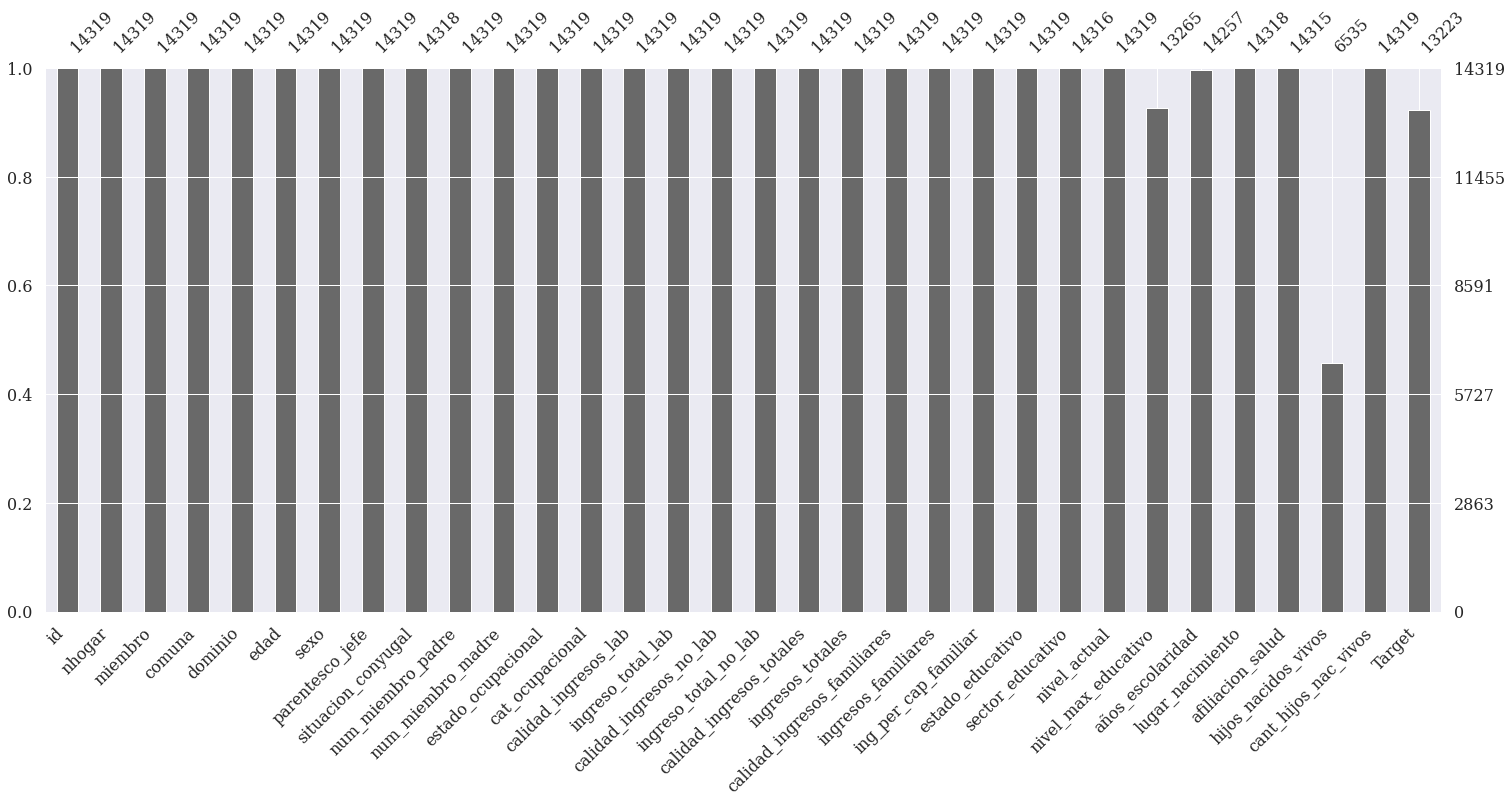

In [ ]:
import missingno as msno
msno.bar(df);

De este gráfico podemos saber a simple vista que las variables "nivel_max_educativo" (y nuestra copia, "Target") e "hijos_nacidos_vivos" tienen la mayor cantidad de valores nulos.

Ahora vamos a construir una tabla resumen con varias estadísticas descriptivas para cada una de las variables, así como con una breve descripción de lo que significa cada una de ellas.

In [ ]:
#Tomamos el código visto en clase para tener un vistazo de las diversas medidas estadísticas de cada variale
from pandas.api.types import is_numeric_dtype
import numpy as np

def univariado_info(df):
  '''Calculo de informacion estadistias y genericas de cada columna de un dataframe'''

  #Creamos un dataframe con columnas especificas:

  df_info = pd.DataFrame(columns=['Cantidad', 'Tipo' , 'Missing', 'Unicos', 'Numeric'])
  #loop de todas las variables del dataframe
  for col in df:

      #obtengo info de la columna
      data_series = df[col]
      #lleno dataframe con las columnas iniciales
      df_info.loc[col] = [data_series.count(), data_series.dtype, data_series.isnull().sum(), data_series.nunique(), is_numeric_dtype(data_series)]

  #calculo el describe 
  df_describe = df.describe(include='all').T[['top', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]
  #calculo sesgo y curtosis
  df_stats = pd.DataFrame([df.skew(), df.kurtosis()], index=['sesgo', 'kurt']).T

  return pd.concat([pd.Series(etiquetas,name='Etiqueta'),pd.concat([df_info,df_describe, df_stats], axis=1)], axis=1).fillna('-')


df_uni_stats = univariado_info(df).reset_index()
df_uni_stats.set_index(df_uni_stats['index'],inplace=True)
df_uni_stats.drop(['index'],axis=1,inplace=True)
# df_uni_stats.rename(index={'index':'variable'},inplace=True)
df_uni_stats

C:\Users\JMC\AppData\Local\Temp\ipykernel_47796\1026010198.py:22: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_stats = pd.DataFrame([df.skew(), df.kurtosis()], index=['sesgo', 'kurt']).T


,Etiqueta,Cantidad,Tipo,Missing,Unicos,Numeric,top,mean,std,min,25%,50%,75%,max,sesgo,kurt
index,,,,,,,,,,,,,,,,
id,Clave que identifica la vivienda,14319,object,0,5795,False,4291,-,-,-,-,-,-,-,0.16901,-0.953158
nhogar,La variable id + nhogar = clave que identifica...,14319,object,0,7,False,1,-,-,-,-,-,-,-,21.366705,687.880709
miembro,Variables id + nhogar + miembro = clave que id...,14319,object,0,19,False,1,-,-,-,-,-,-,-,1.940715,8.605228
comuna,Comuna donde reside la persona encuestada,14319,object,0,15,False,8,-,-,-,-,-,-,-,0.103211,-1.090936
edad,Edad de la persona encuestada,14319,int64,0,101,True,-,38.81549,23.11017,0.0,20.0,37.0,57.0,100.0,0.249452,-0.868539
sexo,Sexo de la persona encuestada,14319,object,0,2,False,Mujer,-,-,-,-,-,-,-,-,-
parentesco_jefe,Parentesco entre la persona encuestada y el je...,14319,object,0,9,False,Jefe,-,-,-,-,-,-,-,-,-
situacion_conyugal,Situación conyugal de la persona encuestada,14318,object,1,7,False,Soltero/a,-,-,-,-,-,-,-,-,-
num_miembro_padre,Número de miembro que corresponde al padre,14319,object,0,9,False,No corresponde,-,-,-,-,-,-,-,-,-


Detectamos que nuestra variable target tiene 1054 valores nulos. Es importante tener este dato presente cuando querramos correr un algoritmo de clasificación.

## Análisis univariado

### Género y edad

Comenzamos con un pantallazo general sobre las primeras cualidades de los datos, 
como muestra representativa para la EPH, sobre quiénes son los ciudadanos representado en el dataset.

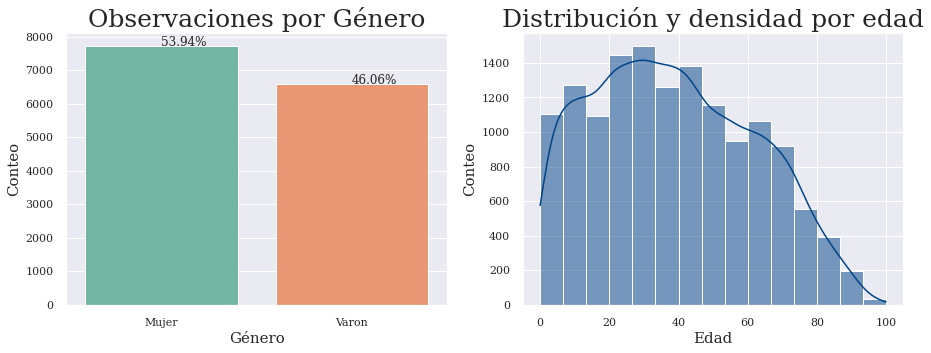

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sex = df['sexo']
edad = df['edad']

sns.countplot(x=sex, ax=axes[0], palette = 'Set2').set(title='Observaciones por Género', xlabel='Género', ylabel='Conteo')

#Agrego los valores porcentuales de la variable sexo
for n,i in enumerate(['Mujer','Varon']):
  porc = df['sexo'].value_counts(normalize=True)[i]*100
  axes[0].text(n,df['sexo'].value_counts(normalize=False).round(2)[i],porc.round(2).astype(str)+'%')

sns.histplot(x=edad,
            ax=axes[1],
            color='#004488',
            bins= 'sturges',
            kde=True).set(title='Distribución y densidad por edad', xlabel='Edad', ylabel='Conteo');

En la variable género los datos parecen equilibrados en las categorías. Para el caso de la variable "edad", la distribución se asemeja a la de una normal.

### Comuna

Seguimos observando la variable "comuna". En la misma se muestra la comuna de la Ciudad de Buenos Aires del entrevistado, de manera de tener una ubicación geográfica. Consideramos importante revisar esta variable ya que tenemos como hipótesis que el nivel educativo alcanzado puede estar dependiendo de la zona geográfica de la ciudad en la que se encuentra el entrevistado.

In [ ]:
#instalamos geopandas para trabajar con mapas
%pip install geopandas

Note: you may need to restart the kernel to use updated packages.


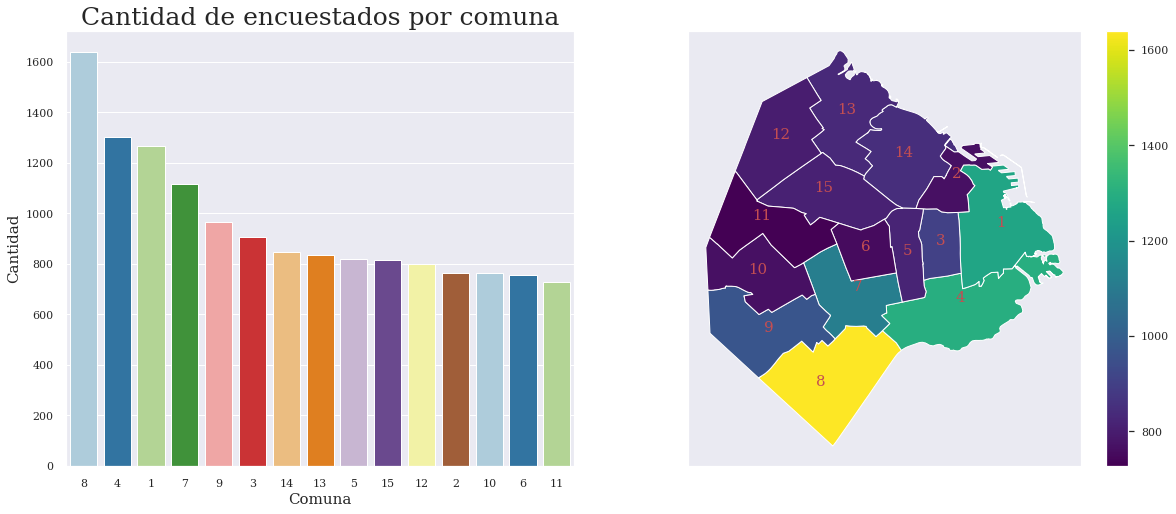

In [ ]:
from cgitb import text
import geopandas as gpd
#Vamos a generar un mapa, así que vamos a importar el mapa de comunas de la Ciudad de Buenos Ainres
comunas = gpd.read_file("https://github.com/LHukovsky/Coderhouse-Final-Project-/raw/main/comunas.geojson")

#Transformamos las variables que vamos a usar para joinear el mapa con la base de manera que coincidan
comunas["COMUNAS"] = comunas["COMUNAS"].apply(int).apply(str)

# Transformamos la base para contablizar la frecuencia con la que aparece cada comuna en la base
com = pd.DataFrame(df["comuna"].value_counts()).reset_index()

# Unimos ambos datasets
df_com = gpd.GeoDataFrame(pd.merge(com,comunas[["COMUNAS","geometry"]],left_on="index",right_on="COMUNAS"))

#generamos el lienzo
fig , ax = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(20,8))
plt.rcParams.update({"font.size":9,"axes.titlesize":25,"axes.labelsize":15, 'font.family':'serif'})

#mapa
df_com[["comuna","geometry"]].plot(ax= ax[1],column="comuna",legend=True,cmap="viridis",
           legend_kwds={'label': ""})
#agrego un gráfico de barras
sns.barplot(data=df_com, x="COMUNAS", y='comuna', color='COMUNAS', palette='Paired', ax=ax[0])

#genero una nueva variable con las coordenadas para poder agregar etiquetas en el centro geográfico de cada comuna
df_com['coords'] = df_com['geometry'].apply(lambda x: x.representative_point().coords[:])
df_com['coords'] = [coords[0] for coords in df_com['coords']]

for idx, row in df_com.iterrows():
    plt.annotate(row['COMUNAS'], xy=row['coords'],horizontalalignment='center',size=15,color="r")

#Título y etiquetas de variables    
ax[0].set_title("Cantidad de encuestados por comuna")
ax[0].set_ylabel("Cantidad")
ax[0].set_xlabel("Comuna")
ax[1].get_xaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False);

Observando los dos gráficos generados vemos que las comunas 1,4,7 y 8 tienen mayor cantidad de casos. Queda por verse si en posteriores análisis es necesario abordar esta diferencia para evitar sesgos. Para eso, será necesario tomar en cuenta el porcentaje de la población total de cada comuna.

### Ingreso familiar per capita

Ahora probamos con observar los ingresos familiares. Creemos que puede ser un indicador interesante del nivel educativo.

In [ ]:
#Armamos una función para graficar y jugar con el nivel del filtrado de la variable y obtener un histograma
#que permita apreciar mejor la distribución de la variable sin tantos outliers
def hist_box(DataFrame, #dataset
             x, #variable del gráfico
             limite,# frecuencia del rango para la etiqueta del eje x
             bins): 
  #sns.set(style="white", rc={"lines.linewidth": 2, "font.size":9,
  #                           "axes.titlesize":20,"axes.labelsize":17, 'font.family':'serif'})
  fig, ax = plt.subplots(figsize=(20,10),nrows=2,ncols=1,sharex=True)
  sns.histplot(x=x,
              data=df[df[x]<limite] ,
              color='#004488',
              ax=ax[1],
              bins= bins,
              kde=True)
  
  ax[0].boxplot(x=df[df[x]<limite][x],vert=False)
  ax[0].set_title(f"{etiquetas[x]} menor a {limite}",size=25)
  ax[1].set_title("")
  ax[0].set(xticks=range(0,limite+1,int(limite/20)))

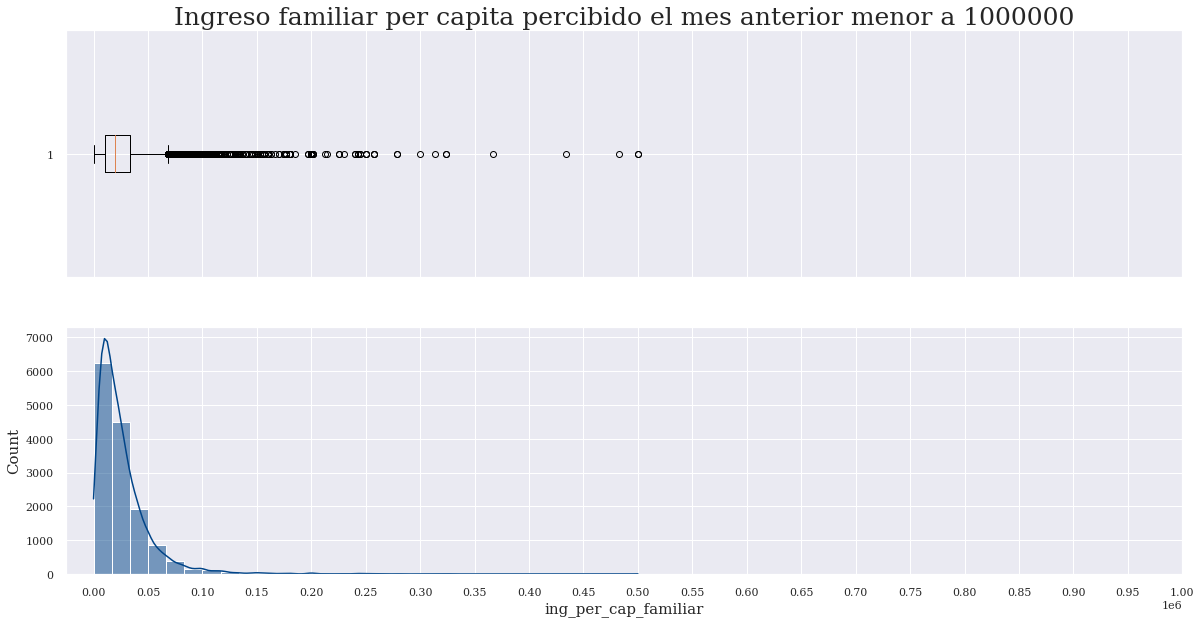

In [ ]:
#probamos graficando con el máximo de la variable
hist_box(df,'ing_per_cap_familiar',max(df.ing_per_cap_familiar),bins=30);

Como hay muchos outliers que impiden ver la distribución correctamente, los quitamos de los gráficos.

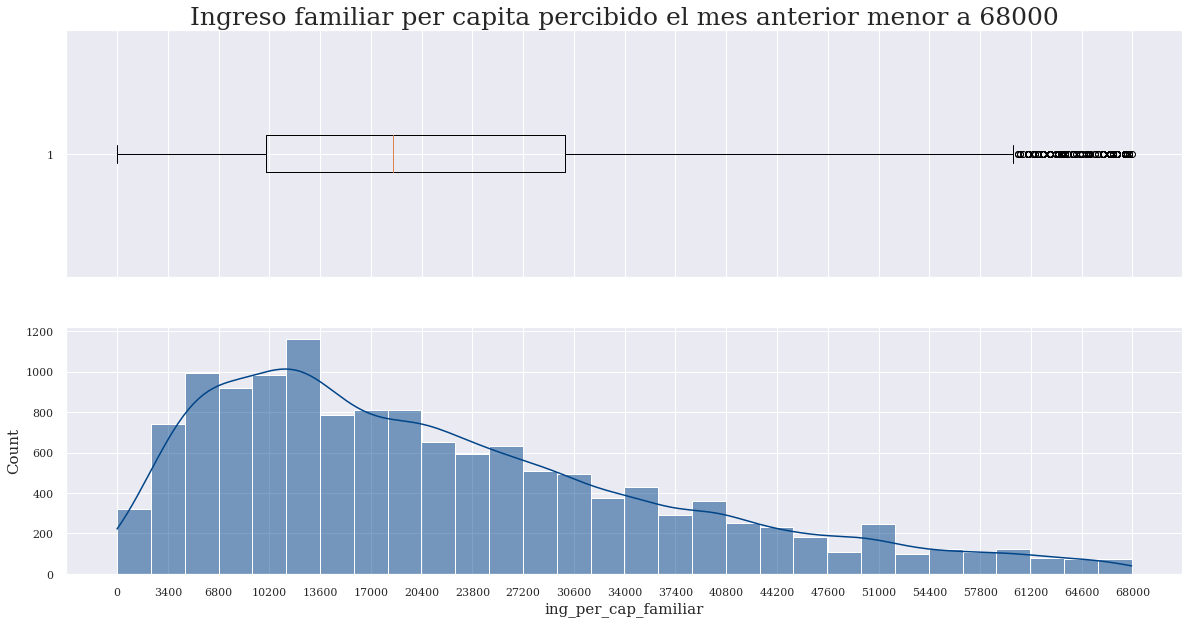

In [ ]:
#Ahora probamos quitando los outliers
r75 = int(df.describe()["ing_per_cap_familiar"]["75%"]) #tercer cuartil
r25 = int(df.describe()["ing_per_cap_familiar"]["25%"]) #segundo cuartil

O = r75 + 1.5 * (r75-r25) #calculamos el límite inferior a los outliers
hist_box(df,"ing_per_cap_familiar",int(O),bins=30)

De este forma vemos que, aún removiendo los outliers, la distribución sigue sesgada.

### Años de escolaridad

Ahora nos enfocamos en analizar los años de escolaridad de los encuestados. Es importante tener presente esta variable en el futuro puesto que es muy probable que correlacione positivamente con nuestro target. 

Comenzamos observando algunas estadísticas descriptivas, sumando para ello un histogramas a nuestro análisis:

In [ ]:
# Texto de título predeterminado
df.describe()[["años_escolaridad"]].T

,count,mean,std,min,25%,50%,75%,max
años_escolaridad,14257.0,10.907905,5.353943,0.0,7.0,12.0,15.0,19.0


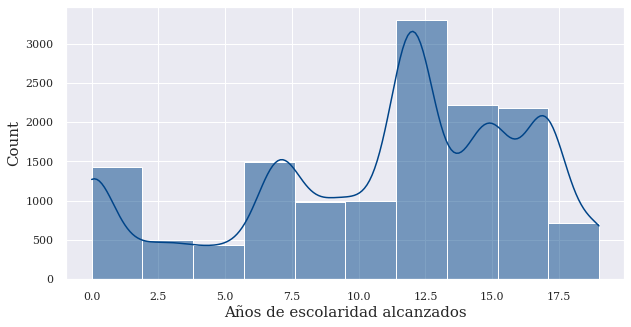

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(x="años_escolaridad",data=df,
             color='#004488',bins= 10,
             kde=True).set_xlabel(etiquetas["años_escolaridad"]);

A simple vista se observan tres "picos": en el valor mínimo, alrededor del 7.5 y alrededor del 12.5. Podemos inferir que estos tres casos corresponden a no tener estudios, solo haber transcurrido el primario y haber transcurrido hasta la educación secundaria, respectivamente.

### Máximo nivel educativo (Target)

Nos avocamos a analizar nuestro target, para eso vamos a tomar en cuenta su frencuencia absoluta así como su frecuencia relativa.

In [ ]:
def freq_table(df, col):

  #seleccion de data
  data = df[col]

  #verificacion de columna y si queremos cortes de intervalos
  if not is_numeric_dtype(data):
  #or not with_cuts:
    #generaion de tabla de frecuenca ,con info absoluta
    freq_tab = pd.crosstab(data, columns='FreqAbs').sort_values('FreqAbs', ascending=False)
   
  #calculo del resto de la tabla de frecuencia
  freq_tab['FreqRel'] = freq_tab['FreqAbs'] / freq_tab['FreqAbs'].sum()
  freq_tab[['FAbsAcumulada', 'FAbsRelativa']] = freq_tab[['FreqAbs','FreqRel']].cumsum()
  return freq_tab

c:\Users\JMC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


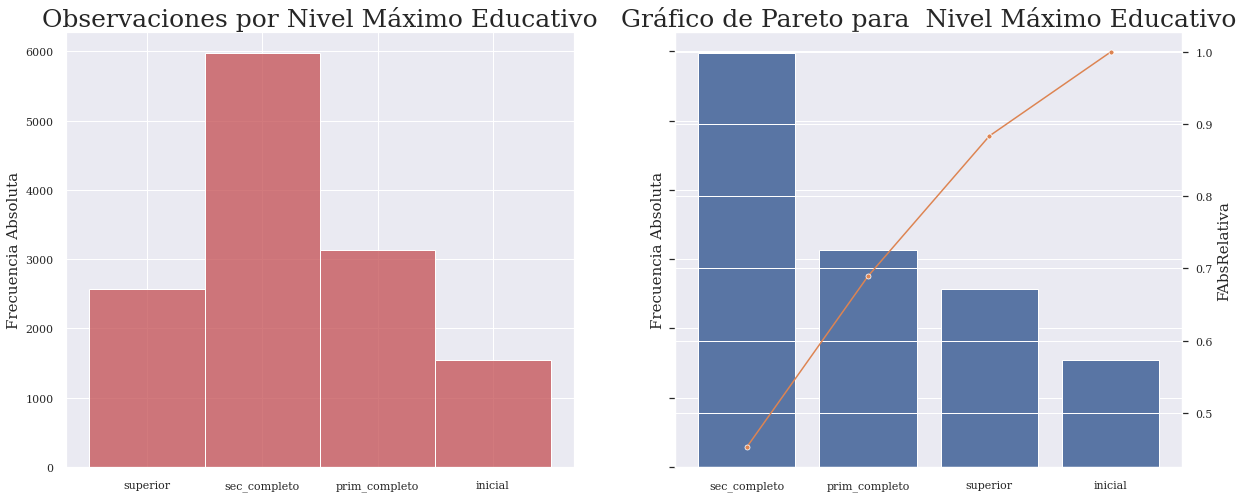

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8), sharey=True);


sns.histplot(x=df['Target'], ax=axes[0], 
             color = 'C3').set(title='Observaciones por Nivel Máximo Educativo', 
                               xlabel='',
                               ylabel='Frecuencia Absoluta');

nivel  = freq_table(df, 'Target').reset_index().sort_values('FreqAbs', ascending=False);

sns.barplot(data=nivel, x='Target', y='FreqAbs', ax=axes[1], 
            color="C0").set(title='Gráfico de Pareto para  Nivel Máximo Educativo', 
                            xlabel='',
                            ylabel='Frecuencia Absoluta');
ax2 = axes[1].twinx();
sns.lineplot(nivel['Target'], nivel["FAbsRelativa"], color="C1", marker="o", ms=5, ax=ax2);

Podemos observar que el nivel maximo educativo más alcanzado es el secundario completo, seguido por el primario. Contrario de lo que habíamos intuido anteriormente, el nivel superior quedó en tercer lugar. 
Adicionalmente, el nivel secundario y primario explican casi el 77% de los datos.

## Análisis bivariado

Para comenzar el análisis bivariado del problema, realizamos diferentes heatmaps para ver si algo nos llama la atención entre las variables numéricas.

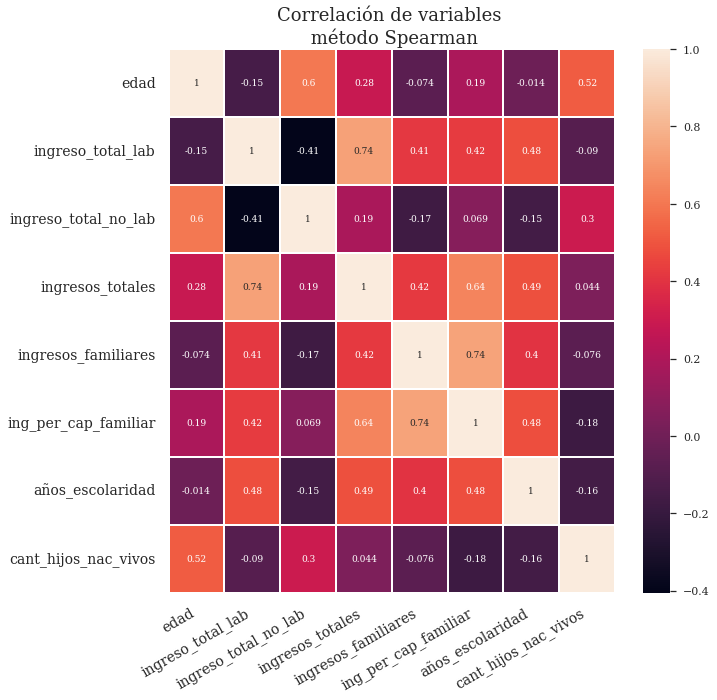

In [ ]:
#generacion de los graficos de correlacion con el método Spearman
plt.figure(figsize=(10,10))
plt.rcParams.update({"font.size":9,"axes.titlesize":15,"axes.labelsize":15, 'font.family':'serif'})
correlation = df.dropna().corr(method="spearman")
high_corr=correlation[correlation>=0.0]
sns.heatmap(correlation, linewidth = 2, annot=True)
plt.title("Correlación de variables \n método Spearman", fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=30,  ha='right');

A simple vista, no se observan fuertes correlaciones.

Podemos notar que la variable "años_escolaridad" correlaciona moderadamente bien con variablres relacionadas al ingreso. 
La principal correlación positiva es "años_escolaridad" con ingreso familiar per cápita ("ing_per_cap_familiar"), lo cual hace sentido teórico.

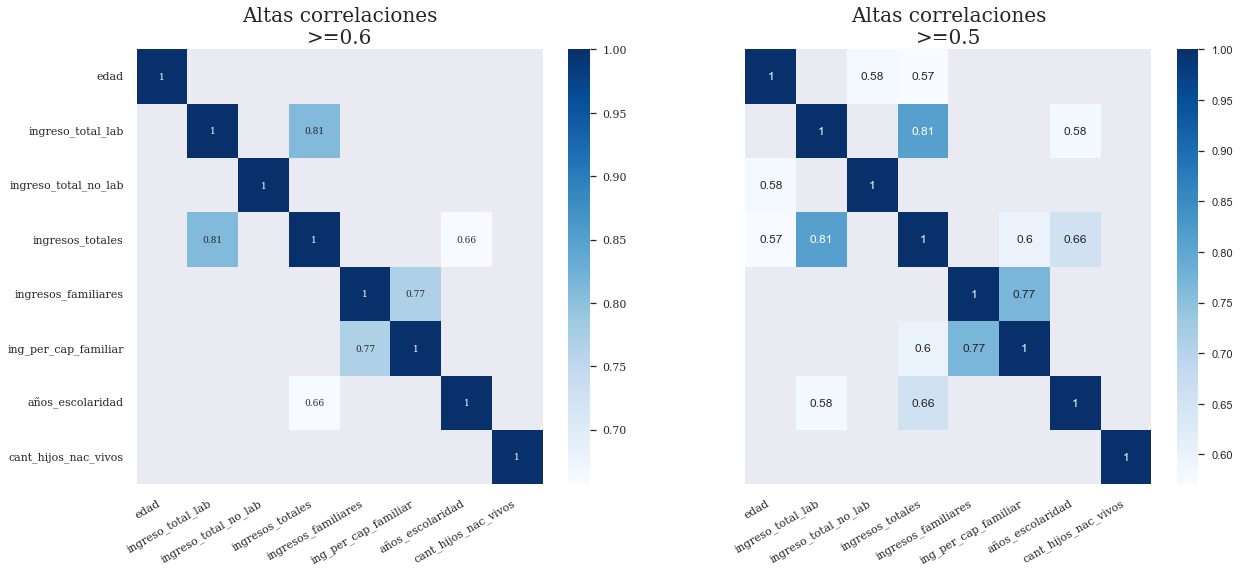

<Figure size 720x864 with 0 Axes>

<Figure size 720x864 with 0 Axes>

In [ ]:
#metodo para solo graficar en base a un threshold
lista=[.6,.5] #treshold de los gráficos (si se quieren agregar más gráficos se puede hacer agregando tresholds a la lista)

fig , ax = plt.subplots(figsize=(20,8), ncols=len(lista) ,sharey=True, sharex=False)
mat_corr_spearman = df.corr('spearman')

for n,i in enumerate(lista):
  high_corr = mat_corr_spearman[mat_corr_spearman>=i]
  plt.figure(figsize=(10,12))
  sns.heatmap(high_corr, cmap="Blues",ax=ax[n], annot=True)
  ax[n].set_title('Altas correlaciones\n>='+str(i),size=20);
  sns.set(font_scale=1);
  ax[n].set_xticklabels(high_corr,rotation=30, ha='right', minor=False);
  

Aquí, vemos que los años de escolaridad alcanzados por los entrevistados tienen algo relación (0.66) con la variable "ingresos_totales".

Por último corremos una tabla de correlación y filtramos las de valores más altos

In [ ]:
def corrFilter(x: pd.DataFrame, thres: float):
    #generate corr 
    xCorr = x.corr('spearman')
    #filter corr by thres
    xFiltered = xCorr[((xCorr >= thres) | (xCorr <= -thres)) & (xCorr !=1.000)]
    #change dataframe format
    xFlattened = xFiltered.unstack().drop_duplicates().reset_index().sort_values(0, ascending= False).dropna()
    #rename columns
    xFlattened.columns = ['Variable_1', 'Variable_2', 'corr_value']
    return xFlattened

corrFilter(df, .5)

,Variable_1,Variable_2,corr_value
3,ingreso_total_lab,ingresos_totales,0.810840
7,ingresos_familiares,ing_per_cap_familiar,0.769356
6,ingresos_totales,años_escolaridad,0.656880
5,ingresos_totales,ing_per_cap_familiar,0.598997
4,ingreso_total_lab,años_escolaridad,0.579614
1,edad,ingreso_total_no_lab,0.578532
2,edad,ingresos_totales,0.570521


**Conclusiones:**

*   Como es esperable, hay alta correlación entre las variables relacionadas al ingreso
*   A su vez, encontramos una alta correlación (66%) entre los ingresos y los años de escolaridad
*   También observamos una relación positiva entre la edad y los ingresos totales

### Comparación entre variables numéricas

C:\Users\JMC\AppData\Local\Temp\ipykernel_47796\281383307.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_day = df.groupby('edad')['ingresos_totales',


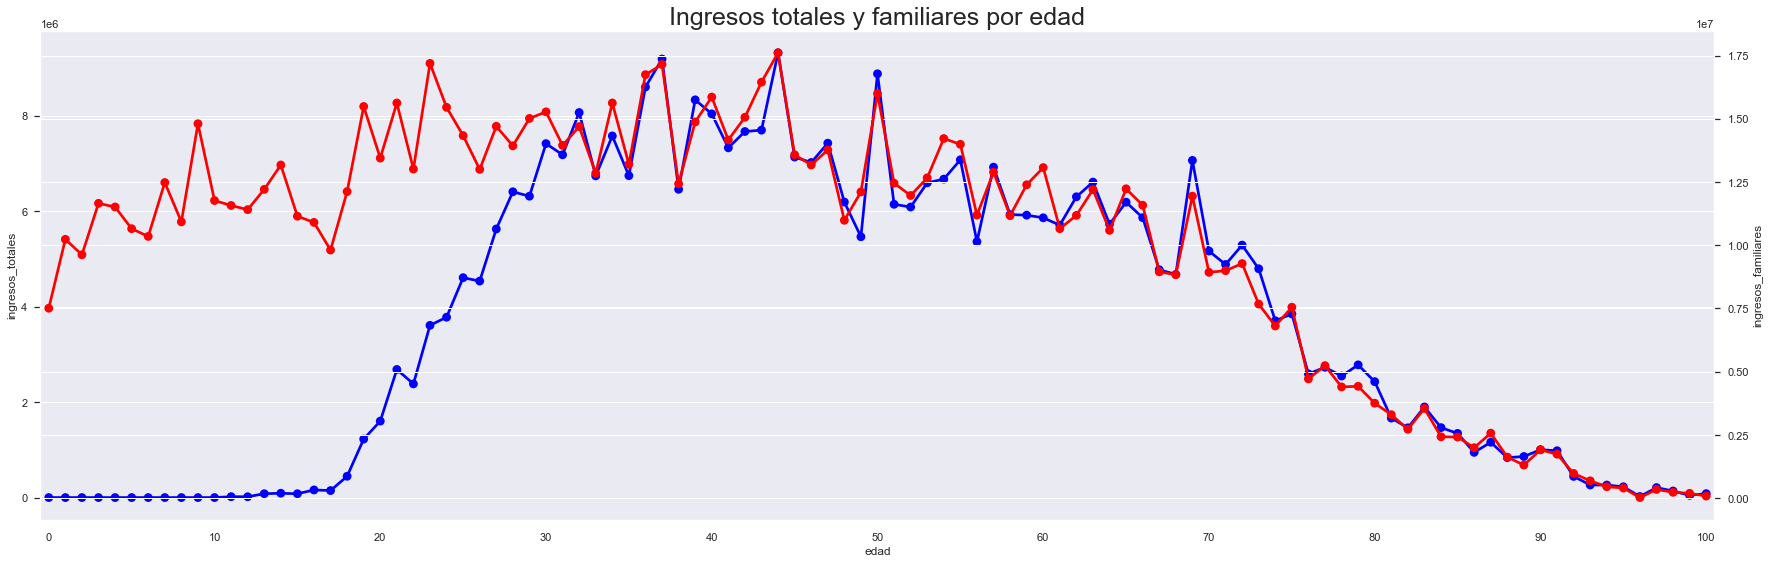

In [ ]:
# grafico lineal en base a edad con dos variables de calculo

plt.figure(figsize=(30, 9))

grouped_day = df.groupby('edad')['ingresos_totales', 
                                 'ingresos_familiares'].sum().reset_index()

ax = sns.pointplot(x = 'edad', y = 'ingresos_totales', data=grouped_day, 
                   color = 'blue', label='ingresos_totales');
ax2 = ax.twinx();
ax = sns.pointplot(x = 'edad', y = 'ingresos_familiares', data=grouped_day,  
                   color = 'red', label='ingresos_familiares', ax=ax2)

ax.set_title("Ingresos totales y familiares por edad",size=25)
ax.set_xticks(range(0,101,10))
ax.set_xticklabels(range(0,101,10));

Se puede ver que desde los 30 años en adelante el ingreso total de la persona se corresponde con el ingreso familiar. Por ende suele haber un unico ingreso fuerte por grupo familiar.

### Comparación de variables categóricas con numéricas

Adicionalmente, vamos a comparar algunas variables con nuestro target, comenzando con los ingresos totales.

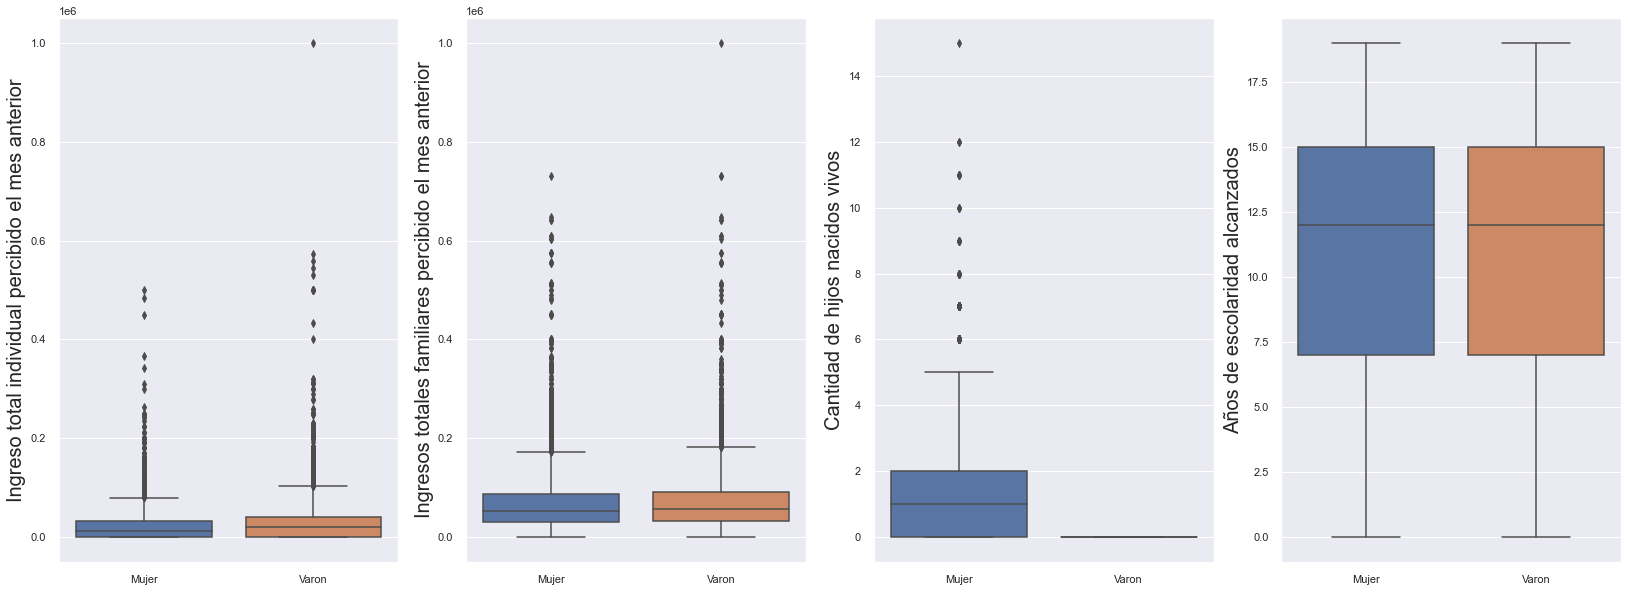

In [ ]:
lista = ['ingresos_totales','ingresos_familiares','cant_hijos_nac_vivos','años_escolaridad']
fig, ax = plt.subplots(figsize=(28,10),ncols=len(lista))

for n,i in enumerate(lista):
  sns.boxplot(x = 'sexo', y= i, data=df,ax=ax[n],orient='v')
  ax[n].set_ylabel(etiquetas[i],size=20)
  ax[n].set_xlabel("")

Probemos quitando outliers, a excepciónn de la cantidad de hijos nacidos vivos (puesto que no arrojará ningún dato nuevo) y de años de escolaridad (que no tiene outliers)

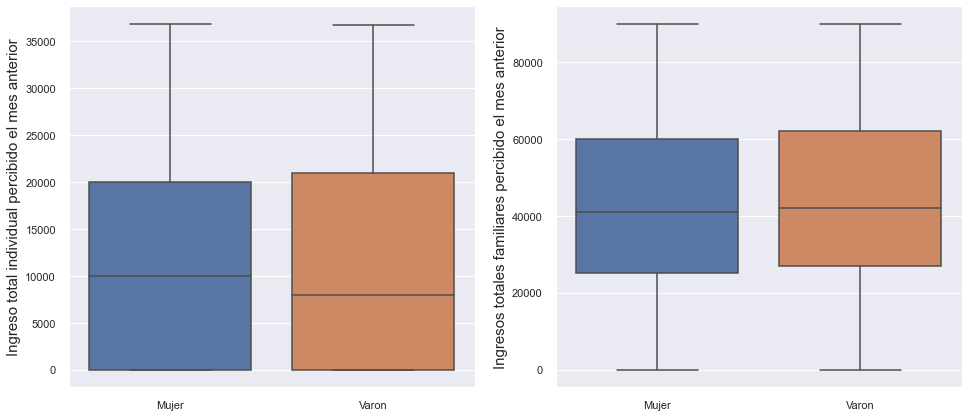

In [ ]:
lista = ['ingresos_totales','ingresos_familiares']
fig, ax = plt.subplots(figsize=(16,7),ncols=len(lista))

for n,i in enumerate(lista):
  data = df[df[i]<df[i].describe()['75%']]
  sns.boxplot(x = 'sexo', y= i, data=data,ax=ax[n],orient='v')
  ax[n].set_ylabel(etiquetas[i],size=15)
  ax[n].set_xlabel("") 


Por parte de las variables de ingreso, no parece haber nada disruptivo. 
La distribución por ingreso y años de escolaridad pareciera ocurrir pero no en un orden lineal.

Llama la atención la variable "sexo": por algún motivo, todos los encuestados hombres figuran sin hijos nacidos vivos. Alternativamente, se podría investigar la metodología de la encuesta para ver si hay alguna respuesta.
Adicionalmente, los hombres parecieran tener ingresos totales y familiares mayores que las mujeres, pero no pareciera que haya distribuciones desiguales en los años de escolaridad.

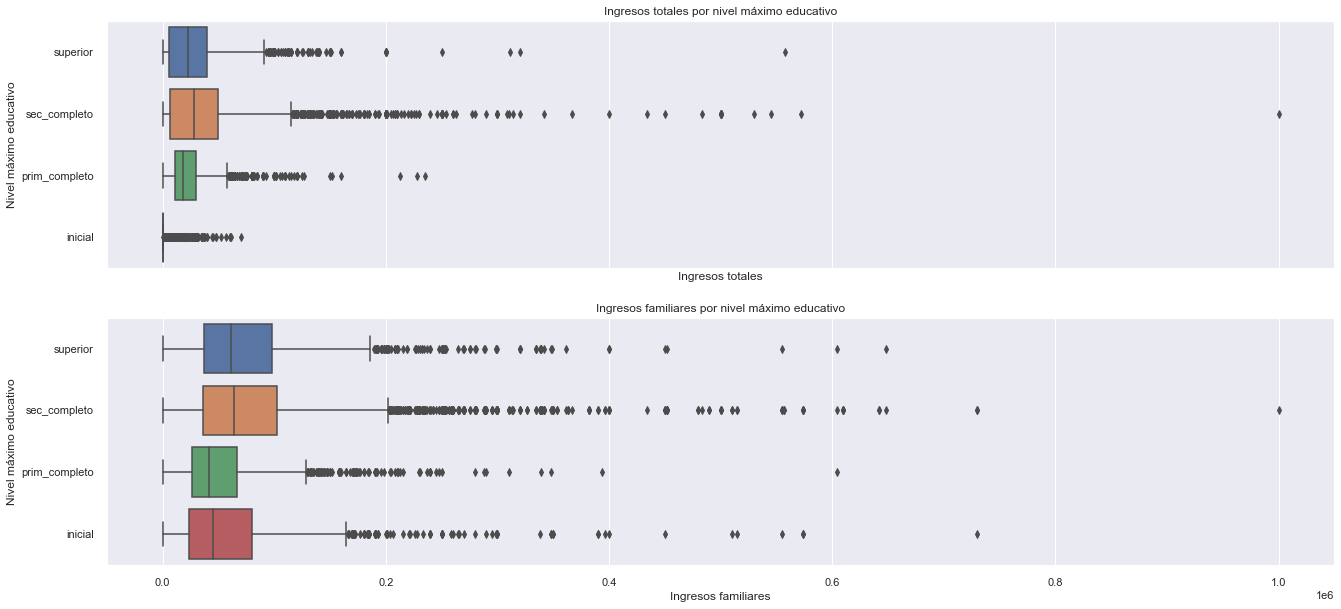

In [ ]:
fig, ax = plt.subplots(figsize=(22,10),nrows=2, sharex=True)
sns.boxplot(y = 'Target', 
            x='ingresos_totales', 
            data=df,ax=ax[0]).set(title="Ingresos totales por nivel máximo educativo", 
                                  ylabel="Nivel máximo educativo", xlabel="Ingresos totales");
sns.boxplot(y = 'Target', 
            x='ingresos_familiares', 
            data=df,ax=ax[1]).set(title="Ingresos familiares por nivel máximo educativo", 
                                  ylabel="Nivel máximo educativo", xlabel="Ingresos familiares");

Ahora probemos sin los outliers, poniendo como tope el percentil 75 del valor de target con mayor valor de ingresos (secundario completo)

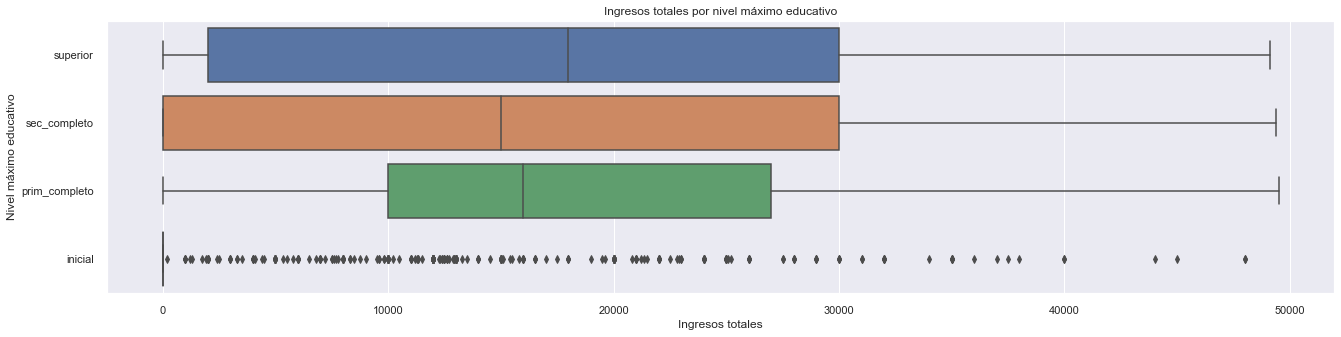

In [ ]:
fig, ax = plt.subplots(figsize=(22,5))

sns.boxplot(data=df[df['ingresos_totales']<(df[df['Target']=='sec_completo']['ingresos_totales'].describe()['75%'])],
            y = 'Target', 
            x='ingresos_totales',            
            ax=ax).set(title="Ingresos totales por nivel máximo educativo", 
                                  ylabel="Nivel máximo educativo", xlabel="Ingresos totales");

Parece que para el nivel inicial la remoción de outliers en otra categoría sigue siendo insuficiente para mostrar la distribución real de la variable. Echemos un vistazo a los valores de esta categoría.

<AxesSubplot:xlabel='ingresos_totales', ylabel='Count'>

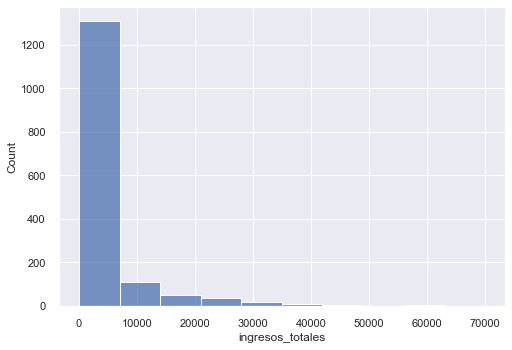

In [ ]:
sns.histplot(data=df[df['Target']=='inicial'],x='ingresos_totales',bins=10)

Logicamente, la enorme mayoría de los ingresos para el valor inicial dan 0, puesto que incluye a personas que en ese momento estaban cursando su educación inicial, por lo que tenían entre 2 y 6 años.

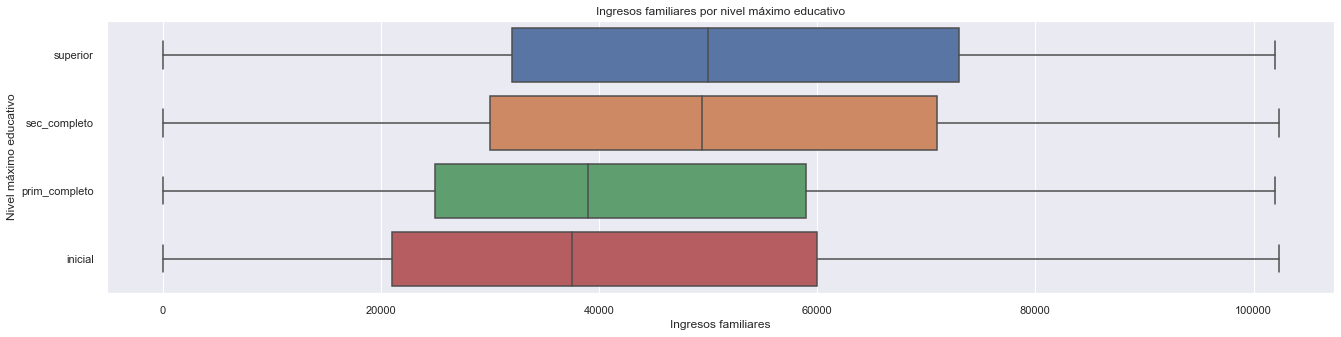

In [ ]:
fig, ax = plt.subplots(figsize=(22,5))

sns.boxplot(y = 'Target', 
            x='ingresos_familiares', 
            data=df[df['ingresos_familiares']<(df[df['Target']=='sec_completo']['ingresos_familiares'].describe()['75%'])],
            ax=ax).set(title="Ingresos familiares por nivel máximo educativo", 
                                  ylabel="Nivel máximo educativo", xlabel="Ingresos familiares");

En definitiva, se observa un corrimiento de los valores centrales (dentro de la caja) hacia la izquierda a medida que aumenta el nivel educativo.

### Variable numéricas con comuna

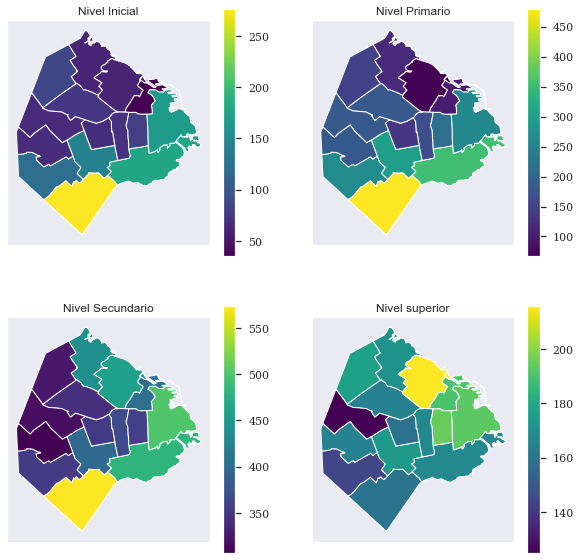

In [ ]:
# Unimos ambos datasets
from tkinter import Variable


m = gpd.GeoDataFrame(pd.merge(pd.DataFrame(df.value_counts(['Target','comuna'])).reset_index(),
                                    comunas[["COMUNAS","geometry"]],left_on="comuna",right_on="COMUNAS"))
#Renombramos una columna para que lo pueda procesar la función de geopandas
m['count'] = m[0]

#generamos el lienzo
fig , ax = plt.subplots(figsize=(10,10),ncols=2,nrows=2,sharex=True,sharey=True)
plt.rcParams.update({"font.size":12,"axes.titlesize":25,"axes.labelsize":15, 'font.family':'serif'})

def mapa(variable,etiqueta,fila,columna):
  #mapa 
  m[m['Target']==variable].plot(column='count',
                                legend=True,
                                cmap="viridis",
                                legend_kwds={'label': ""},
                                ax=ax[fila,columna])
  
  #Título y etiquetas de variables    
  ax[fila,columna].set_title(etiqueta,size=12)
  ax[fila,columna].get_xaxis().set_visible(False)
  ax[fila,columna].get_yaxis().set_visible(False);

mapa("superior","Nivel superior",1,1)
mapa("sec_completo","Nivel Secundario",1,0)
mapa("prim_completo","Nivel Primario",0,1)
mapa("inicial","Nivel Inicial",0,0)

Se observa que en el sur de la ciudad hay  mayor cantidad de encuestados con niveles de inicial, primario y secundario completo, mientras que el norte (particularmente el barrio de Palermo) tiene mayor cantidad de personas con estudios superiores. En menor medida también las comunas del este (comunmente llamado el "centro" de la ciudad) destacan por la cantidad de encuestados con nivel superior.

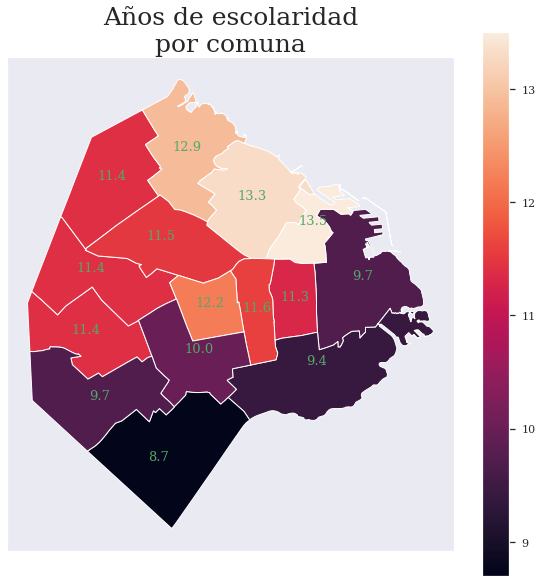

In [ ]:
#armamos el mismo dataset anterior pero tomando el promedio de cada variable por comuna
m = gpd.GeoDataFrame(pd.merge(df.groupby("comuna").aggregate(np.mean),
                                    comunas[["COMUNAS","geometry"]],left_on="comuna",right_on="COMUNAS"))

#redondeamos los valores
m["años_escolaridad"] = round(m["años_escolaridad"],1)

#armamos el gráfico
fig, ax = plt.subplots(figsize=(10,10))

m.plot(column="años_escolaridad",legend=True,cmap="rocket",
             legend_kwds={'label': ""},ax=ax)

#genero una nueva variable con las coordenadas para poder agregar etiquetas en el centro geográfico de cada comuna
m['coords'] = m['geometry'].apply(lambda x: x.representative_point().coords[:])
m['coords'] = [coords[0] for coords in m['coords']]

for idx, row in m.iterrows():
    plt.annotate(row['años_escolaridad'], xy=row['coords'],
                 horizontalalignment='center',size=13,color="g")
    
#Título y etiquetas de variables    
ax.set_title("Años de escolaridad\npor comuna")
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False);

Lo que podemos observar en los últimos dos gráficos es una clara división geográfica del nivel educativo:

*  Las comunas del norte son las que tienen mayor nivel educativo
*  Las comunas del centro tienen niveles medios
*  Las comunas del sur (con las comuna 6 en el centro de la ciudad como outlier) y la comuna 1 en el este son las que tienen niveles más bajos

## Análisis multivariado

Probamos de cruzar años de escolaridad, nivel máximo educativo y los ingresos totales.

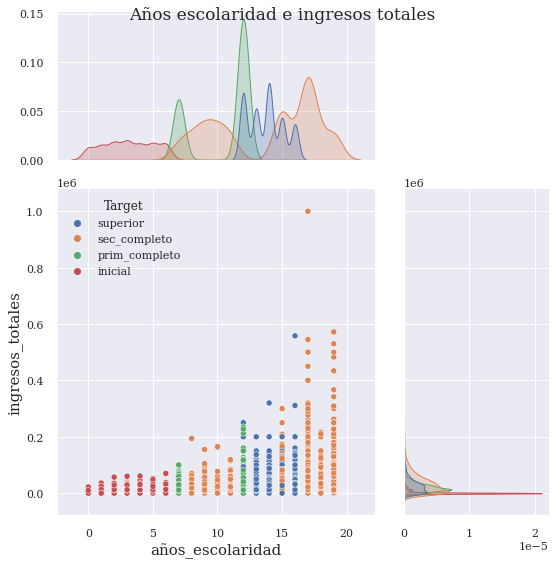

In [ ]:
a=sns.jointplot(data=df, y="ingresos_totales", x="años_escolaridad", hue='Target',   height=8, ratio=2, marginal_ticks=True)
a.fig.suptitle("Años escolaridad e ingresos totales", fontsize=17);

Conclusiones de la visualización:
* Hasta los 6 años, como era esperable, todos los casos llegan al nivel inicial.
* Vemos dos años en que aparece el primario completo: 7 y 12 años. Estimamos que se debe a la división entre los que comenzaro su educación en la primaria y los que comenzaron en el nivel inicial.
* A partir de los 12 años vemos un aumento consistente de los ingresos totales.

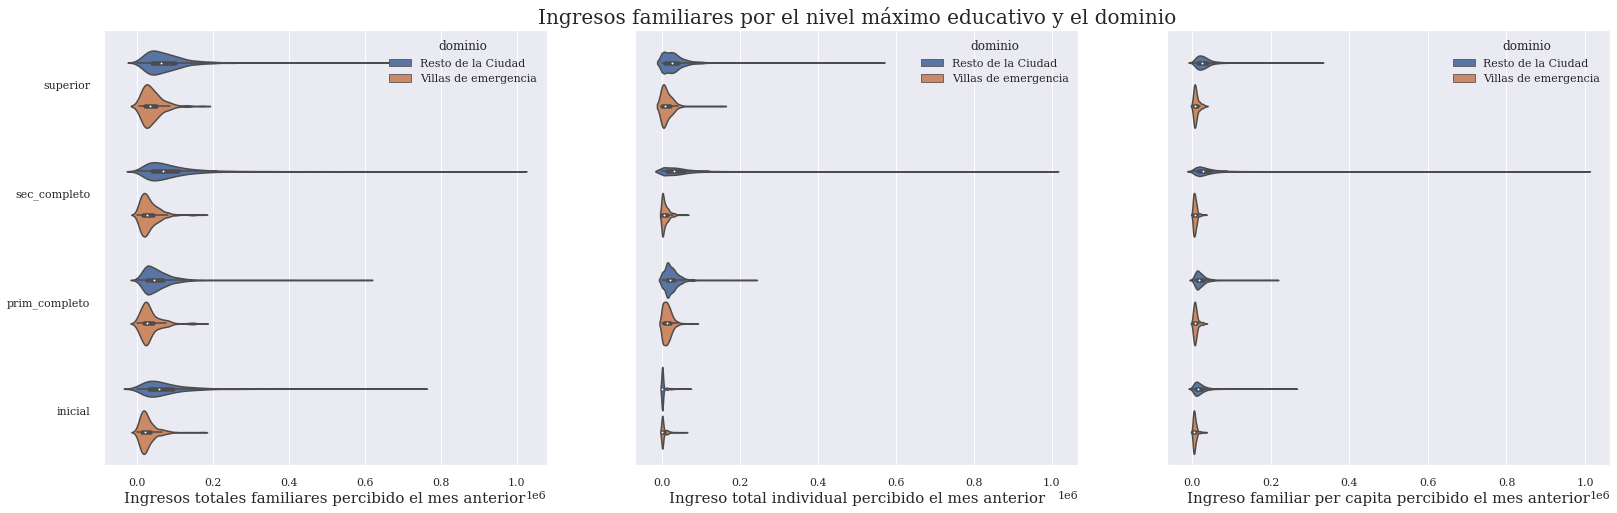

In [ ]:
fig, ax = plt.subplots(figsize=(27,8),ncols=3,sharey=True)
for n,i in enumerate(['ingresos_familiares','ingresos_totales','ing_per_cap_familiar']):
  sns.violinplot(data=df,x=i,hue='dominio',y='Target',ax=ax[n])
  ax[n].set_ylabel("")
  ax[n].set_xlabel(etiquetas[i])
ax[1].set_title("Ingresos familiares por el nivel máximo educativo y el dominio",size=20);

¿Y si sacamos los outliers?

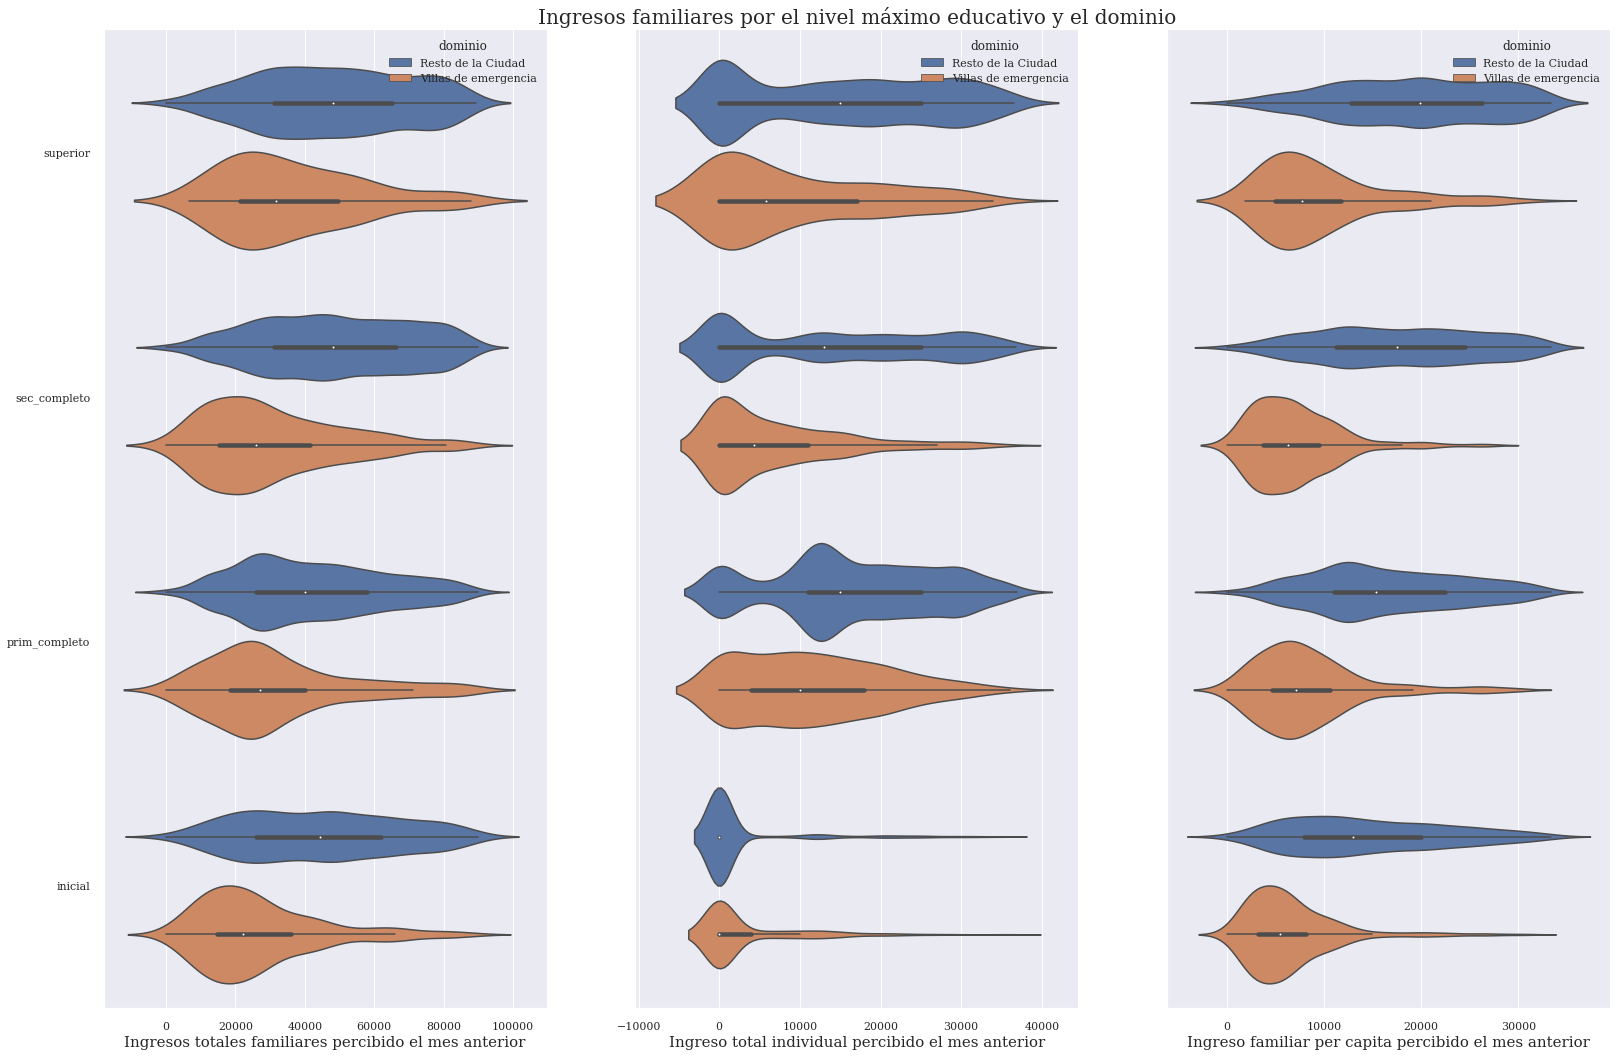

In [ ]:
fig, ax = plt.subplots(figsize=(27,18),ncols=3,sharey=True)
for n,i in enumerate(['ingresos_familiares','ingresos_totales','ing_per_cap_familiar']):
  sns.violinplot(data=df[df[i]<df[i].describe()['75%']],x=i,hue='dominio',y='Target',ax=ax[n])
  ax[n].set_ylabel("")
  ax[n].set_xlabel(etiquetas[i])
ax[1].set_title("Ingresos familiares por el nivel máximo educativo y el dominio",size=20);

Aquí obtuvimos un descubrimiento interesante: no importa el nivel máximo educativo, los casos que no provienen de villas de emergencia (dominio="villas_de_emergencia") obtienen en promedio ingresos más altos en todos los niveles educativos. El alcanzar estudios superiores no parece homogeneizar ambos conjuntos. Esto se puede observar en el segundo gráfico, ya que el violín naranja acumula mayor cantidad de casos hacia la derecha, en comparación con los violines azules que tienen una mayor distribución.

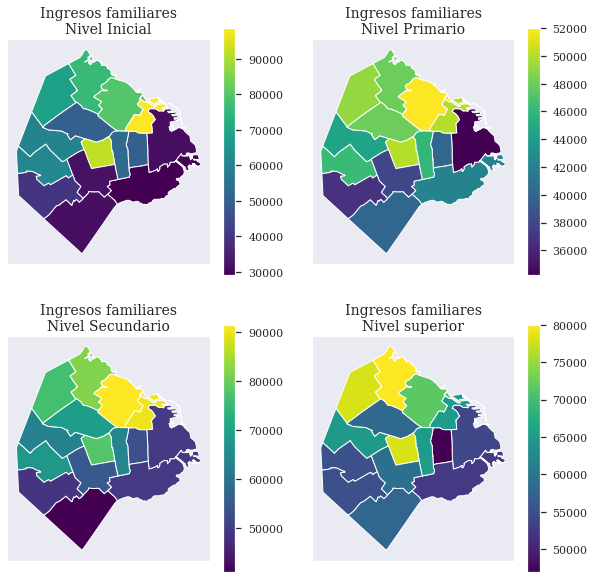

In [ ]:
# Unimos ambos datasets
df2 = df.groupby(["comuna",'Target']).agg({'ingresos_familiares':"median"}).reset_index() #Tomamos la mediana de los ingresos familiares

df2 = gpd.GeoDataFrame(pd.merge(df2,comunas[["COMUNAS","geometry"]],left_on="comuna",right_on="COMUNAS"))

#comunas.iloc[:,0:15] = comunas.iloc[:,0:15].applymap(int)

#generamos el lienzo
fig , ax = plt.subplots(figsize=(10,10),ncols=2,nrows=2,sharex=True,sharey=True)
plt.rcParams.update({"font.size":12,"axes.titlesize":25,"axes.labelsize":15, 'font.family':'serif'})

def mapa(variable,etiqueta,fila,columna):
  #mapa
  df2[df2['Target']==variable].plot(column='ingresos_familiares',
                                            legend=True,cmap="viridis",legend_kwds={'label': ""},ax=ax[fila,columna])

  #Título y etiquetas de variables    
  ax[fila,columna].set_title('Ingresos familiares\n' + etiqueta,size=14)
  ax[fila,columna].get_xaxis().set_visible(False)
  ax[fila,columna].get_yaxis().set_visible(False);

mapa("superior","Nivel superior",1,1)
mapa("sec_completo","Nivel Secundario",1,0)
mapa("prim_completo","Nivel Primario",0,1)
mapa("inicial","Nivel Inicial",0,0)

Aquí podemos observar que a medida que avanza el nivel educativo máximo se atenúan levemente las diferencias de ingresos familiares entre comunas. Queda pendiente cruzar estos datos con la edad, para saber si el hecho de incluir a menores de edad está sesgando los valores para nivel inicial, primario y secundario.

# Modelos analíticos

Comenzamos transformando algunas variables para poder trabajar con los algoritmos:
* recategorizando la variables "Target" en variables numéricas,
* y reagrupamos la variable "comuna" por regiones para reducir la dimensionalidad.

Y verificamos como quedan las variables del dataset:

In [ ]:
# Recategorizando la variables "Target" en variables numéricas

df.loc[df['Target']=='inicial','Target']       = 1
df.loc[df['Target']=='prim_completo','Target'] = 2
df.loc[df['Target']=='sec_completo','Target']  = 3
df.loc[df['Target']=='superior','Target']      = 4
df.loc[df['Target']== np.nan,'Target']      = np.nan


# Reagrupamos la variable comuna por regiones para reducir la dimensionalidad
df['region'] = df['comuna']
df.loc[df['comuna'].isin(['12','13','14','2','15']),'region'] = 'norte'
df.loc[df['comuna'].isin(['5','3','1']),'region'] = 'centro'
df.loc[df['comuna'].isin(['8','4']),'region'] = 'sur'
df.loc[df['comuna'].isin(['6','7','9','10','11']),'region'] = 'oeste'

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14319 entries, 0 to 14318
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           14319 non-null  object 
 1   nhogar                       14319 non-null  object 
 2   miembro                      14319 non-null  object 
 3   comuna                       14319 non-null  object 
 4   dominio                      14319 non-null  object 
 5   edad                         14319 non-null  int64  
 6   sexo                         14319 non-null  object 
 7   parentesco_jefe              14319 non-null  object 
 8   situacion_conyugal           14318 non-null  object 
 9   num_miembro_padre            14319 non-null  object 
 10  num_miembro_madre            14319 non-null  object 
 11  estado_ocupacional           14319 non-null  object 
 12  cat_ocupacional              14319 non-null  object 
 13  calidad_ingresos

Y verificamos los diferentes valores de nuestra variable "Target:

In [ ]:
df.Target.unique().T

array([4, 3, 2, nan, 1], dtype=object)

## Tratado de nulos

Armamos una función para tener una lista limpia de variables con nulos, que nos da como resultado:

In [ ]:
#Armo una función para tener una lista limpia de variables con nulos
def info_nulos(data:pd.DataFrame):
    nulos = data.isnull().sum().where(lambda x:x>0).dropna().apply(int).sort_values()
    if len(nulos)>0:
        print(f'Variables con valores nulos:\n\n{nulos}')
    else: print(f'El dataset no tiene valores nulos')
info_nulos(df)

Variables con valores nulos:

situacion_conyugal        1
lugar_nacimiento          1
sector_educativo          3
afiliacion_salud          4
años_escolaridad         62
nivel_max_educativo    1054
Target                 1096
hijos_nacidos_vivos    7784
dtype: int64


Entonces, para eliminar los valores nulos de la variable "años_escolaridad" reemplazamos los nulos con la mediana por comuna y sexo.

In [ ]:
#reemplazo los nulos con la mediana por comuna y sexo

#creo dataframe de referencia
anios_escol_ref_null = df.groupby(['sexo', 'comuna']).median()['años_escolaridad'].reset_index()
anios_escol_ref_null

#funcion de replace en base a dataframe agrupado
def fill_na_escol_grouped(df_grouped , row_replace):
  if pd.isna(row_replace['años_escolaridad']):
    return df_grouped[(df_grouped['sexo'] == row_replace['sexo']) & (df_grouped['comuna'] == row_replace['comuna'])]['años_escolaridad'].values[0]
  else:
    return row_replace['años_escolaridad']

#transformacion de train
df['años_escolaridad'] = df.apply(lambda row: fill_na_escol_grouped(anios_escol_ref_null, row), axis=1)

### Variable remplazadas con moda

A las variables:
* "lugar_nacimiento",
* "situacion_conyugal",
* "afiliacion_salud",

las vamos a reemplazar con la moda.


In [ ]:
#variables que voy a reemplazar simplemente con la moda 
#lugar_nacimiento, situacion_conyugal, afiliacion_salud

cols_rem_nulls = ['lugar_nacimiento', 'situacion_conyugal', 'afiliacion_salud', 'sector_educativo', 'hijos_nacidos_vivos']
moda_variables= df.filter(cols_rem_nulls).mode()
df[cols_rem_nulls]=df[cols_rem_nulls].fillna(df.mode().iloc[0])

Y como resultado, solo nos quedan las siguientes variables con valores nulos:

In [ ]:
info_nulos(df)

Variables con valores nulos:

nivel_max_educativo    1054
Target                 1096
dtype: int64


Como a la variable "nivel_max_educativo" ya no la vamos a utilizar dado que contamos con la variable "Target" la eliminamos, ahora, como no es recomendable reemplazar los nulos del target del train, los eliminamos y por último transformamos nuestra variable "Target" a tipo entero.

In [ ]:
#De paso elimino la columna q ya no vamos a utilizar porq tenemos el Target
df.drop(columns='nivel_max_educativo', inplace=True)

#como solamente quedan los nulos del target elimino en todo el train
df.dropna(axis=0, inplace=True)
#Paso a número entero  
df['Target']=df.Target.astype(int)

Verificamos una última vez, para mostrar que ya no tenemos nulos en nuestro dataset.

In [ ]:
info_nulos(df)

El dataset no tiene valores nulos


## Target

### Borrado de variables

Hay muchas variables que consideramos que no es necesario sumarlas al algoritmo de clasificacion dado que brindan información repetida o que no suma para la clasificación. A continuación se comparten las categoria que se descartarán para correr el algoritmo: 

*   id: no suma información para la clasificación,
*   nhogar: no suma información para la clasificación,
*   parentesco_jefe: no suma información para la clasificación,
*   miembro: no suma información para la clasificación,
*   num_miembro_padre: no suma información para la clasificación,
*   num_miembro_madre: no suma información para la clasificación,
*   cat_ocupacional brinda la misma información que estado_ocupacional,
*   calidad_ingresos_lab brinda la misma información que ingreso_total_lab,
*   calidad_ingresos_no_lab brinda la misma información que ingreso_total_no_lab,
*   calidad_ingresos_totales brinda la misma información que ingresos_totales,
*   calidad_ingresos_familiares brinda la misma información que ingreso_familiares,
*   estado_educativo no aporta información para la clasificación,
*   nivel_actual no aporta información para la clasificacion,
*   hijos_nacidos_vivos brinda la misma información que cant_hijos_nac_vivos,
*   comuna: variable ya abordada en la variable 'región'.

In [ ]:
# Hay variables que no aportan nada entonces las sacamos
no_var = ['id','nhogar', 'miembro', 'parentesco_jefe', 'num_miembro_padre',
          'num_miembro_padre','num_miembro_madre','cat_ocupacional',
          'calidad_ingresos_lab', 'calidad_ingresos_no_lab', 
          'calidad_ingresos_totales','calidad_ingresos_familiares', 
          'calidad_ingresos_familiares','hijos_nacidos_vivos',
          'estado_educativo','comuna','nivel_actual']
          
df.drop(axis=1, columns=no_var, inplace=True)

## División de train y test

En primer lugar, hacemos la división entre test y el train en un 30% y un 70% respectivamente, con una semilla especifica.

In [ ]:
from sklearn.model_selection import train_test_split
#creo un dataset train y otro test 70-30 %%
train, test = train_test_split(df, test_size = 0.30,random_state=50)

### Train

In [ ]:
train.head()

,dominio,edad,sexo,situacion_conyugal,estado_ocupacional,ingreso_total_lab,ingreso_total_no_lab,ingresos_totales,ingresos_familiares,ing_per_cap_familiar,sector_educativo,años_escolaridad,lugar_nacimiento,afiliacion_salud,cant_hijos_nac_vivos,Target,region
13112,Resto de la Ciudad,75,Varon,Casado/a,Ocupado,30000,12000,42000,54000,27000,No corresponde,9.0,CABA,Otros,0,3,oeste
4601,Resto de la Ciudad,41,Varon,Unido/a,Ocupado,26000,0,26000,41000,13667,No corresponde,14.0,CABA,Solo obra social,0,4,sur
3102,Resto de la Ciudad,17,Varon,Soltero/a,Inactivo,0,1600,1600,16600,3320,Estatal/publico,8.0,CABA,Solo sistema publico,0,3,sur
10356,Resto de la Ciudad,29,Varon,Unido/a,Ocupado,15000,0,15000,27000,5400,No corresponde,12.0,CABA,Solo prepaga o mutual via OS,0,2,oeste
13819,Resto de la Ciudad,89,Mujer,Unido/a,Inactivo,0,0,0,30000,15000,No corresponde,12.0,CABA,Solo plan de medicina prepaga por contratación...,0,2,centro


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9256 entries, 13112 to 6444
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   dominio               9256 non-null   object 
 1   edad                  9256 non-null   int64  
 2   sexo                  9256 non-null   object 
 3   situacion_conyugal    9256 non-null   object 
 4   estado_ocupacional    9256 non-null   object 
 5   ingreso_total_lab     9256 non-null   int64  
 6   ingreso_total_no_lab  9256 non-null   int64  
 7   ingresos_totales      9256 non-null   int64  
 8   ingresos_familiares   9256 non-null   int64  
 9   ing_per_cap_familiar  9256 non-null   int64  
 10  sector_educativo      9256 non-null   object 
 11  años_escolaridad      9256 non-null   float64
 12  lugar_nacimiento      9256 non-null   object 
 13  afiliacion_salud      9256 non-null   object 
 14  cant_hijos_nac_vivos  9256 non-null   int64  
 15  Target           

#### One Hot Encoding

Aplicamos one hot encoding al train sobre las categorias:

* "region",
* "situacion_conyugal"
* "sector_educativo",
* "estado_ocupacional",
* "afiliacion_salud",
* "lugar_nacimiento",
* "sexo",
* "dominio".

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore', #ponemos ignore para poder ommitir cuando puede pasar que no exista los mismos valores 
                        sparse=False) # generarlo como. matrix para poder generar las columnas adecuadas

#Variables que pasaremos al encoding
categoricas = ['region', 'situacion_conyugal', 'sector_educativo',
                'estado_ocupacional','afiliacion_salud','lugar_nacimiento','sexo','dominio']

#Hay muchas variables categoricas que transformar 
#entrenamiento para genera el preprocesamiento one hot encoding para las variables indicadas
encoder.fit(train[categoricas])

#transformo en train datasets en base a la clase generada
cat_encoding = pd.DataFrame(encoder.transform(train[categoricas]), 
                            columns=encoder.get_feature_names(categoricas))
cat_encoding.head()

c:\Users\JMC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,region_centro,region_norte,region_oeste,region_sur,situacion_conyugal_Casado/a,situacion_conyugal_Divorciado/a,situacion_conyugal_No corresponde,situacion_conyugal_Separado/a de unión o matrimonio,situacion_conyugal_Soltero/a,situacion_conyugal_Unido/a,...,lugar_nacimiento_Otra provincia,lugar_nacimiento_PBA excepto GBA,lugar_nacimiento_PBA sin especificar,lugar_nacimiento_Pais limitrofe,lugar_nacimiento_Pais no limitrofe,lugar_nacimiento_Partido GBA,sexo_Mujer,sexo_Varon,dominio_Resto de la Ciudad,dominio_Villas de emergencia
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


Luego juntamos las variables que nos interesan con las cetegóricas encoding y por último eliminamos las categórias sin el encoding.

In [ ]:
#joineo de las variables que deseo con categoricas encoding
df_all_train = pd.concat([train, cat_encoding], axis=1, join='inner')
df_all_train.drop(categoricas,axis=1, inplace=True)

In [ ]:
cat_encoding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9256 entries, 0 to 9255
Data columns (total 34 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   region_centro                                                               9256 non-null   float64
 1   region_norte                                                                9256 non-null   float64
 2   region_oeste                                                                9256 non-null   float64
 3   region_sur                                                                  9256 non-null   float64
 4   situacion_conyugal_Casado/a                                                 9256 non-null   float64
 5   situacion_conyugal_Divorciado/a                                             9256 non-null   float64
 6   situacion_conyugal_No corresponde               

Por último renombramos algunas variables para que sean más cortas:
* "afiliacion_salud_Solo obra social": "afiliacion_salud_solo_o_social",
* "afiliacion_salud_Solo plan de medicina prepaga por contratación voluntaria" : "afiliacion_salud_solo_prepaga",
* "afiliacion_salud_Solo prepaga o mutual via OS" : "afiliacion_salud_solo_prepaga_o_mutual",
* "afiliacion_Solo sistema publico": "afiliacion_salud_solo_sist_pub",
* "situacion_conyugal_Separado/a de unión o matrimonio": "situacion_conyugal_separado".

In [ ]:
# Por último renombramos algunas variables para que sean más cortas
df_all_train.rename(columns = 
{'afiliacion_salud_Solo obra social': 'afiliacion_salud_solo_o_social',
'afiliacion_salud_Solo plan de medicina prepaga por contratación voluntaria' : "afiliacion_salud_solo_prepaga",
'afiliacion_salud_Solo prepaga o mutual via OS' : 'afiliacion_salud_solo_prepaga_o_mutual',
'afiliacion_Solo sistema publico': 'afiliacion_salud_solo_sist_pub',
'situacion_conyugal_Separado/a de unión o matrimonio': 'situacion_conyugal_separado'
},inplace = True)

#### División de X e Y

Ahora, spliteamos los datos en target y features para el train.

In [ ]:
#spliteo de datos en target y features for test and train

#seleccion de x values sin el target
X_train = df_all_train.loc[:,df_all_train.columns != 'Target']

#seleccion del target
y_train = df_all_train.Target

y_train
X_train.head()

,edad,ingreso_total_lab,ingreso_total_no_lab,ingresos_totales,ingresos_familiares,ing_per_cap_familiar,años_escolaridad,cant_hijos_nac_vivos,region_centro,region_norte,...,lugar_nacimiento_Otra provincia,lugar_nacimiento_PBA excepto GBA,lugar_nacimiento_PBA sin especificar,lugar_nacimiento_Pais limitrofe,lugar_nacimiento_Pais no limitrofe,lugar_nacimiento_Partido GBA,sexo_Mujer,sexo_Varon,dominio_Resto de la Ciudad,dominio_Villas de emergencia
4601,41,26000,0,26000,41000,13667,14.0,0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3102,17,0,1600,1600,16600,3320,8.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
8552,53,12000,0,12000,12000,12000,15.0,0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4693,41,75000,0,75000,135000,33750,15.0,2,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2365,36,30000,0,30000,30000,7500,15.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


### Test

#### One Hot Encoding

Repetimos el ecoding que hicimos anteriormente para el train, pero ahora para el test.

In [ ]:
#la primera parte del encoding ya esta hecha
cat_encoding_test = pd.DataFrame(encoder.transform(test[categoricas]), 
                            columns=encoder.get_feature_names(categoricas))
cat_encoding_test.head()

#joineo de las variables que deseo con categoricas encoding
df_all_test = pd.concat([test, cat_encoding], axis=1, join='inner')
df_all_test.drop(categoricas,axis=1, inplace=True)

c:\Users\JMC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
df_all_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2473 entries, 6879 to 5518
Data columns (total 43 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   edad                                                                        2473 non-null   int64  
 1   ingreso_total_lab                                                           2473 non-null   int64  
 2   ingreso_total_no_lab                                                        2473 non-null   int64  
 3   ingresos_totales                                                            2473 non-null   int64  
 4   ingresos_familiares                                                         2473 non-null   int64  
 5   ing_per_cap_familiar                                                        2473 non-null   int64  
 6   años_escolaridad                             

In [ ]:
#renombramos algunas variables muy largas
# Por último renombramos algunas variables para que sean más cortas
df_all_test.rename(columns = 
{'afiliacion_salud_Solo obra social': 'afiliacion_salud_solo_o_social',
  'afiliacion_salud_Solo plan de medicina prepaga por contratación voluntaria' : "afiliacion_salud_solo_prepaga",
  'afiliacion_salud_Solo prepaga o mutual via OS' : 'afiliacion_salud_solo_prepaga_o_mutual',
  'afiliacion_Solo sistema publico': 'afiliacion_salud_solo_sist_pub',
  'situacion_conyugal_Separado/a de unión o matrimonio': 'situacion_conyugal_separado'},
  inplace = True)

#### División de X e Y

Ahora, spliteamos los datos en target y features para el test.

In [ ]:
# spliteo de datos y target del test
X_test = df_all_test.loc[:,df_all_test.columns != 'Target'] 
y_test = df_all_test.Target

In [ ]:
X_test.head()

,edad,ingreso_total_lab,ingreso_total_no_lab,ingresos_totales,ingresos_familiares,ing_per_cap_familiar,años_escolaridad,cant_hijos_nac_vivos,region_centro,region_norte,...,lugar_nacimiento_Otra provincia,lugar_nacimiento_PBA excepto GBA,lugar_nacimiento_PBA sin especificar,lugar_nacimiento_Pais limitrofe,lugar_nacimiento_Pais no limitrofe,lugar_nacimiento_Partido GBA,sexo_Mujer,sexo_Varon,dominio_Resto de la Ciudad,dominio_Villas de emergencia
6879,9,0,0,0,90000,30000,3.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5580,16,0,0,0,68000,11333,9.0,0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
7204,51,150000,0,150000,396000,132000,19.0,0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
6982,48,10000,4000,14000,14000,3500,12.0,3,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
6636,49,50000,0,50000,72600,24200,12.0,1,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


## Árbol de decisión

In [ ]:
#training del modelo
from sklearn import tree

model_default = tree.DecisionTreeClassifier(random_state = 50) # con hiperparametros default
model_default.fit(X_train, y_train)

#modelo generado con algun hiperparamtros diferente
model_max_depth = tree.DecisionTreeClassifier(random_state = 50, max_depth=10) 
model_max_depth.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=50)

### Prueba

In [ ]:
#prediccion
y_pred_test = model_max_depth.predict(X_test)

In [ ]:
#prediccion
X_test['pred'] = y_pred_test
X_test['Target'] = y_test
X_test.head()

,edad,ingreso_total_lab,ingreso_total_no_lab,ingresos_totales,ingresos_familiares,ing_per_cap_familiar,años_escolaridad,cant_hijos_nac_vivos,region_centro,region_norte,...,lugar_nacimiento_PBA sin especificar,lugar_nacimiento_Pais limitrofe,lugar_nacimiento_Pais no limitrofe,lugar_nacimiento_Partido GBA,sexo_Mujer,sexo_Varon,dominio_Resto de la Ciudad,dominio_Villas de emergencia,pred,Target
6879,9,0,0,0,90000,30000,3.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1,1
5580,16,0,0,0,68000,11333,9.0,0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,3,3
7204,51,150000,0,150000,396000,132000,19.0,0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3,3
6982,48,10000,4000,14000,14000,3500,12.0,3,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2,2
6636,49,50000,0,50000,72600,24200,12.0,1,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2,2


### Acuracy

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#accuracy
#No corre porque falta sacar el "no corresponde"
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))

confusion_matrix.index = ['Inicial','Primario', 'Secundario', 'Superior']
confusion_matrix.columns = ['Predicc. Inicial','Predicc. Primario', 'Predicc. Secundario', 'Predicc. Superior']
confusion_matrix

Accuracy score for test data is: 0.9142741609381319


,Predicc. Inicial,Predicc. Primario,Predicc. Secundario,Predicc. Superior
Inicial,367,0,1,0
Primario,0,411,17,38
Secundario,0,13,1106,7
Superior,0,82,54,377


Hacemos una evaluación con el classification report

In [ ]:
from sklearn.metrics import classification_report, f1_score

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       368
           2       0.81      0.88      0.85       466
           3       0.94      0.98      0.96      1126
           4       0.89      0.73      0.81       513

    accuracy                           0.91      2473
   macro avg       0.91      0.90      0.90      2473
weighted avg       0.91      0.91      0.91      2473



En general las métricas dan muy bien. Queda por analizar si las variables están siendo bien elegidas.

### Gráficos

### Confusion matrix

In [ ]:
X_test=X_test.drop(['pred', 'Target'], axis=1)

c:\Users\JMC\AppData\Local\Programs\Python\Python310\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


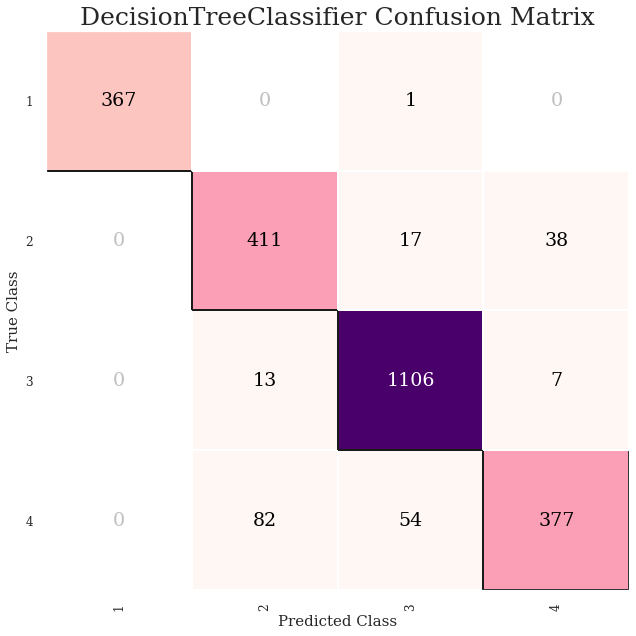

<AxesSubplot:title={'center':'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
#graficar la matrix
from yellowbrick.classifier import ConfusionMatrix
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(9,9))
cm = ConfusionMatrix(model_max_depth, cmap='RdPu')
cm.score(X_test, y_test)
for label in cm.ax.texts:
    label.set_size(19)
cm.poof()

### Visualización del arbol

In [ ]:
import pydotplus #pip install pydotplus
from sklearn.tree import export_graphviz

def tree_graph_to_png(tree, feature_names, class_names, png_file_to_save):
    tree_str = export_graphviz(
        tree,
        out_file=None,
        feature_names=feature_names,
        class_names=class_names,
        rounded=True)
    
    graph = pydotplus.graph_from_dot_data(tree_str)  
    graph.write_png(png_file_to_save)

#lista de variables
list_features = [x for x in df_all_train.columns if x != 'Target']
tree_graph_to_png(model_max_depth, list_features, df_all_train.Target.unique().astype(str), 'model.png')

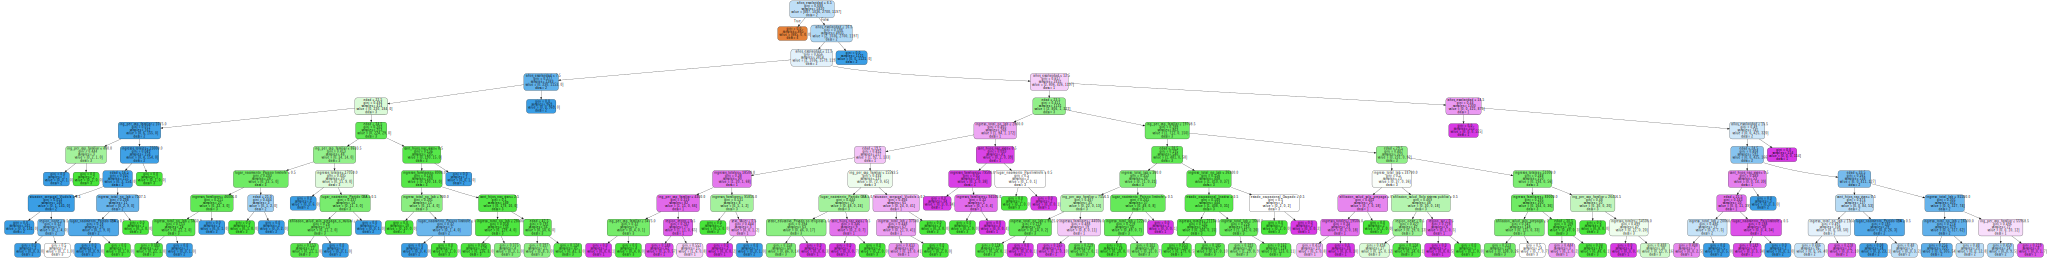

<Figure size 1440x720 with 0 Axes>

In [ ]:
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
plt.figure(figsize=(20,10))
list_features = [x for x in df_all_train.columns if x != 'Target']
data = export_graphviz(model_max_depth,out_file=None,
                       feature_names=list_features,
                       class_names=df_all_train.Target.unique().astype(str),   
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(data)
graph

## Random Forest

### Comienzo de entrenamiento 

Vamos a trasnfomrar los datos a que sean numericos pero como ejemplo les voy a dejar que tambien hagamos una transformacion de los numeros

In [ ]:
#transformacion numerica
from sklearn.preprocessing import MinMaxScaler

numeric_encoder = MinMaxScaler()
numeric_encoder.fit(X_train)
x_minmax = numeric_encoder.transform(X_train)
# x_minmax = numeric_encoder.fit_transform(X_train)
x_minmax = pd.DataFrame(x_minmax)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# crear el clasificador
#classifier = RandomForestRegressor(n_estimators=100)
classifier = DecisionTreeClassifier(max_depth=5, criterion='gini', random_state=123)

# Entrenar el modelo usando el conjunto de entranamiento
classifier.fit(x_minmax, y_train)

DecisionTreeClassifier(max_depth=5, random_state=123)

## Prediccion


In [ ]:
#trasnform test dataset con las trasnfomracion del entrenamiento
x_test_encoder = numeric_encoder.transform(X_test)
y_pred = classifier.predict(x_test_encoder)

In [ ]:
X_test['pred'] = y_pred
X_test['Target'] = y_test
X_test.head()

,edad,ingreso_total_lab,ingreso_total_no_lab,ingresos_totales,ingresos_familiares,ing_per_cap_familiar,años_escolaridad,cant_hijos_nac_vivos,region_centro,region_norte,...,lugar_nacimiento_PBA sin especificar,lugar_nacimiento_Pais limitrofe,lugar_nacimiento_Pais no limitrofe,lugar_nacimiento_Partido GBA,sexo_Mujer,sexo_Varon,dominio_Resto de la Ciudad,dominio_Villas de emergencia,pred,Target
6879,9,0,0,0,90000,30000,3.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1,1
5580,16,0,0,0,68000,11333,9.0,0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,3,3
7204,51,150000,0,150000,396000,132000,19.0,0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3,3
6982,48,10000,4000,14000,14000,3500,12.0,3,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2,2
6636,49,50000,0,50000,72600,24200,12.0,1,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2,2


## Metricas



In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


#accuracy
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred))

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred))

confusion_matrix.index = ['Inicial','Primario', 'Secundario', 'Superior']
confusion_matrix.columns = ['Predicc. Inicial','Predicc. Primario', 'Predicc. Secundario', 'Predicc. Superior']
confusion_matrix

Accuracy score for test data is: 0.8916295996765062


,Predicc. Inicial,Predicc. Primario,Predicc. Secundario,Predicc. Superior
Inicial,367,0,1,0
Primario,0,413,4,49
Secundario,0,13,1113,0
Superior,0,61,140,312


Se evalúa la capacidad predictiva del árbol inicial calculando el accuracy en el conjunto de test. El modelo inicial es capaz de predecir correctamente un 89 % de las observaciones del conjunto de test.

In [ ]:
from sklearn.metrics import classification_report, f1_score

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       368
           2       0.85      0.89      0.87       466
           3       0.88      0.99      0.93      1126
           4       0.86      0.61      0.71       513

    accuracy                           0.89      2473
   macro avg       0.90      0.87      0.88      2473
weighted avg       0.89      0.89      0.89      2473



In [ ]:
# verificar características importantes

print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
feature_importances_df = pd.DataFrame(
    {"feature": list(X_train.columns), "importance": classifier.feature_importances_}
).sort_values("importance", ascending=False)

# Mostrar
feature_importances_df[feature_importances_df['importance']>0]

Importancia de los predictores en el modelo
-------------------------------------------


,feature,importance
6,años_escolaridad,0.927386
0,edad,0.072614


Evaluando la importancia de cada predictor podemos ver que existe una variable que tiene un impacto del 92% sobre la predicción "años_escolaridad" y en segundo lugar otra variable que tiene el 7,3%. A fin de obtener un modelo robusto, definimos eliminar dichas variables y volver a correr el modelo predictivo.

In [ ]:
X_train_predictores = X_train.drop(['años_escolaridad', 'edad'], axis=1)
X_test_predictores = X_test.drop(['años_escolaridad', 'edad', 'pred', 'Target'], axis=1)

Entrenamiendo y prediccion

In [ ]:
#transformacion numerica
from sklearn.preprocessing import MinMaxScaler

numeric_encoder = MinMaxScaler()
numeric_encoder.fit(X_train_predictores)
x_minmax_predictores = numeric_encoder.transform(X_train_predictores)
x_minmax_predictores = pd.DataFrame(x_minmax_predictores)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# crear el clasificador
#classifier = RandomForestRegressor(n_estimators=100)
classifier = DecisionTreeClassifier(max_depth=5, criterion='gini', random_state=123)

# Entrenar el modelo usando el conjunto de entranamiento
classifier.fit(x_minmax_predictores, y_train)

DecisionTreeClassifier(max_depth=5, random_state=123)

In [ ]:
X_test_predictores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2473 entries, 6879 to 5518
Data columns (total 40 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ingreso_total_lab                       2473 non-null   int64  
 1   ingreso_total_no_lab                    2473 non-null   int64  
 2   ingresos_totales                        2473 non-null   int64  
 3   ingresos_familiares                     2473 non-null   int64  
 4   ing_per_cap_familiar                    2473 non-null   int64  
 5   cant_hijos_nac_vivos                    2473 non-null   int64  
 6   region_centro                           2473 non-null   float64
 7   region_norte                            2473 non-null   float64
 8   region_oeste                            2473 non-null   float64
 9   region_sur                              2473 non-null   float64
 10  situacion_conyugal_Casado/a             2473 non-null   f

In [ ]:
#trasnform test dataset con las trasnfomracion del entrenamiento
x_test_encoder_predictores = numeric_encoder.transform(X_test_predictores)
y_pred_predictores = classifier.predict(x_test_encoder_predictores)

In [ ]:
X_test_predictores['pred'] = y_pred_predictores
X_test_predictores['target'] = y_test
X_test_predictores.head()

,ingreso_total_lab,ingreso_total_no_lab,ingresos_totales,ingresos_familiares,ing_per_cap_familiar,cant_hijos_nac_vivos,region_centro,region_norte,region_oeste,region_sur,...,lugar_nacimiento_PBA sin especificar,lugar_nacimiento_Pais limitrofe,lugar_nacimiento_Pais no limitrofe,lugar_nacimiento_Partido GBA,sexo_Mujer,sexo_Varon,dominio_Resto de la Ciudad,dominio_Villas de emergencia,pred,target
6879,0,0,0,90000,30000,0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1,1
5580,0,0,0,68000,11333,0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1,3
7204,150000,0,150000,396000,132000,0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3,3
6982,10000,4000,14000,14000,3500,3,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2,2
6636,50000,0,50000,72600,24200,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3,2


In [ ]:
# verificar características importantes

print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
feature_importances_df = pd.DataFrame(
    {"feature": list(X_train_predictores.columns), "importance": classifier.feature_importances_}
).sort_values("importance", ascending=False)

# Mostrar
feature_importances_df[feature_importances_df['importance']>0]

Importancia de los predictores en el modelo
-------------------------------------------


,feature,importance
2,ingresos_totales,0.481638
0,ingreso_total_lab,0.169920
5,cant_hijos_nac_vivos,0.163388
4,ing_per_cap_familiar,0.094213
3,ingresos_familiares,0.051217
1,ingreso_total_no_lab,0.028654
7,region_norte,0.003848
24,afiliacion_salud_Otros,0.002516
10,situacion_conyugal_Casado/a,0.002352
35,lugar_nacimiento_Partido GBA,0.002255


#Metricas

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


#accuracy
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_predictores))

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_predictores))

confusion_matrix.index = ['Inicial','Primario', 'Secundario', 'Superior']
confusion_matrix.columns = ['Predicc. Inicial','Predicc. Primario', 'Predicc. Secundario', 'Predicc. Superior']
confusion_matrix

Accuracy score for test data is: 0.5143550343712091


,Predicc. Inicial,Predicc. Primario,Predicc. Secundario,Predicc. Superior
Inicial,300,25,43,0
Primario,27,199,235,5
Secundario,206,161,749,10
Superior,77,56,356,24


In [ ]:
from sklearn.metrics import classification_report, f1_score

print(classification_report(y_test, y_pred_predictores))

              precision    recall  f1-score   support

           1       0.49      0.82      0.61       368
           2       0.45      0.43      0.44       466
           3       0.54      0.67      0.60      1126
           4       0.62      0.05      0.09       513

    accuracy                           0.51      2473
   macro avg       0.53      0.49      0.43      2473
weighted avg       0.53      0.51      0.46      2473



Al eliminar los Features "Años_escolaridad" y "Edad" conseguimos un modelo robusto. Sin embargo, La Presición del método ha disminuido a 51%

# Conclusiones hasta ahora

* Al quitar las variables con mayor importancia, nos quedó un modelo que performa mucho peor. Queda por decidir si conviene quitarlas.